In [3]:
import random
import pandas as pd
import math
import operator
import numpy as np
import itertools

#candidate categories
#person of color, gender/sex, etc.

D1_cands={
    'B':'Noah Ernst',
    'F':'Joe Allen',
    'G':'Terrence Hayes',
    'H':'David Linn',
    'I':'Jamie Dunphy',
    'J':'Steph Routh',
    'M':'Peggy Sue Owens',
    'N':'Loretta Smith',
    'O':'Timur Ender',
    'P':'Doug Clove',
    'Q':'Candace Avalos'
}
D1_categories={
    'B': 'White Man',
    'F':'White Man',
    'G': 'Black Man',
    'H':'White Man',
    'I': 'White Man',
    'J': 'White Woman',
    'M': 'White Woman',
    'N': 'Black Woman',
    'O': 'White Man',
    'P': 'White Man',
    'Q': 'Black/Latina Woman'
}

race_info_D1={
    'Noah Ernst': 'White Man',
    'Joe Allen':'White Man',
    'Terrence Hayes': 'Black Man',
    'David Linn':'White Man',
    'Jamie Dunphy': 'White Man',
    'Steph Routh': 'White Woman',
    'Peggy Sue Owens': 'White Woman',
    'Loretta Smith': 'Black Woman',
    'Timur Ender': 'White Man',
    'Doug Clove': 'White Man',
    'Candace Avalos': 'Black/Latina Woman',
    'Cayle Tern': 'Asian Man'
}
D2_cands={
    'A': 'Sameer Kanal',
    'B': 'Marnie Glickman',
    'D': 'Dan Ryan',
    'F': 'Michelle DePass',
    'G': 'Bob Simril',
    'H': 'Elana Pirtle-Guiney',
    'I': 'Tiffany Penson',
    'J': 'Mariah Hudson',
    'L': 'Jonathan Tasini',
    'P': 'Debbie Kitchin',
    'U': 'Nat West'
    
}
D2_categories={
    'A': 'Indian Man',
    'B': 'White Woman', #Slogan: Marnie is a badass
    'D': 'White Man',
    'F': 'Black Woman',
    'G': 'White Man',
    'H': 'White Woman',
    'I': 'Black Woman',
    'J': 'White Woman',
    'L': 'White Man',
    'P': 'White Woman',
    'U': 'White Man'
}

race_info_D2={
    'Sameer Kanal': 'Indian Man',
    'Marnie Glickman': 'White Woman', #Slogan: Marnie is a badass
    'Dan Ryan': 'White Man',
    'Michelle DePass': 'Black Woman',
    'Bob Simril': 'Black Man',
    'Elana Pirtle-Guiney': 'White Woman',
    'Tiffany Penson': 'Black Woman',
    'Mariah Hudson': 'White Woman',
    'Jonathan Tasini': 'White Man',
    'Debbie Kitchin': 'White Woman',
    'Nat West': 'White Man'
}

D3_cands={
    'C':'Chris Flanary',
    'E': 'Harrison Kass',
    'F': 'Rex Burkholder',
    'H': 'Philippe Knab',
    'J': 'Matthew (Matt) Anderson',
    'O': 'Jesse Cornett',
    'P':'Sandeep Bali',
    'Q':'Melodie Beirwagen',
    'R': 'Daniel DeMelo',
    'T': 'Tiffany Koyama Lane',
    'U': 'Kezia Wanner',
    'V': 'Steve Novick',
    'W': 'Angelita Morrilo',
    'e': 'Jonathan (Jon) Walker'
    
}
D3_categories={
    'C':'White Undetermined',
    'E': 'White Man',
    'F': 'White Man',
    'H': 'White Man',
    'J': 'Black Man',
    'O': 'White Man',
    'P':'Indian Man',
    'Q':'White Woman',
    'R': 'White Man',
    'T': 'Asian Woman',
    'U': 'White Woman',
    'V': 'White Man',
    'W': 'Latina Woman',
    'e': 'White Man'
}

race_info_D3={
    'Chris Flanary': 'White Woman',
    'Harrison Kass': 'White Man',
    'Rex Burkholder': 'White Man',
    'Philippe Knab': 'White Man',
    'Matthew (Matt) Anderson': 'Black Man',
    'Jesse Cornett': 'White Man',
    'Sandeep Bali': 'Indian Man',
    'Melodie Beirwagen':'White Woman',
    'Daniel DeMelo':'White Man',
    'Tiffany Koyama Lane':'Asian Woman',
    'Kezia Wanner':'White Woman',
    'Steve Novick':'White Man',
    'Angelita Morrilo': 'Latina Woman',
    'Jonathan (Jon) Walker':'White Man',
    'Cristal Azul Otero': 'Latina Woman'
}

D4_cands={
    'C':'Mitch Green',
    'F': 'Olivia Clark',
    'G':'Bob Weinstein',
    'H': 'John Toran',
    'J':'Ciatta R Thompson',
    'L': 'Chloe Mason',
    'O': 'Tony Morse',
    'Q':'Kevin Goldsmith',
    'T':'Stanley Penkin',
    'W':'Eli Arnold',
    'X':'Eric Zimmerman',
    'Z':'Chad Lykins',
    'a': 'Lisa Freeman',
    'b':'Sarah Silkie',
    'e': 'Andra Vltavin'
}
D4_categories={
    'C':'White Man',
    'F': 'White Woman',
    'G':'White Man',
    'H': 'Black Man',
    'J':'Black Unknown',
    'L': 'Black Woman',
    'O': 'White Man',
    'Q':'White Man',
    'T':'White Man',
    'W':'White Man',
    'X':'White Man',
    'Z':'White Man',
    'a': 'White Woman',
    'b':'White Woman',
    'e': 'White Woman'
}
race_info_D4={
    'Mitch Green':'White Man',
    'Olivia Clark':'White Woman',
    'Bob Weinstein':'White Man',
    'John Toran':'Black Man',
    'Ciatta R Thompson':'Black Non-Binary',
    'Chloe Mason':'Black Woman',
    'Tony Morse':'White Man',
    'Kevin Goldsmith':'White Man',
    'Stanley Penkin':'White Man',
    'Eli Arnold':'White Man',
    'Eric Zimmerman':'White Man',
    'Chad Lykins':'White Man',
    'Lisa Freeman':'White Woman',
    'Sarah Silkie':'White Woman',
    'Andra Vltavin':'White Woman'
}


In [64]:
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper
def findsubsets(s, n):
    return list(itertools.combinations(s, n))

def maximize_representation(frame,n,S,cands_to_keep,num_voters):
    #list1=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h']
    
    cand_subsets=findsubsets(cands_to_keep,S)
    subset_scores={}
    for subset in cand_subsets:
        vote_count_for_subset=0
        for k in range(len(frame)):
            top_S=frame.iloc[k]['ballot'][0:min(S,len(frame.iloc[k]['ballot']))]
            for cand in subset:
                if cand in top_S:
                    vote_count_for_subset+=frame.iloc[k]['Count']
                    break
        subset_scores[subset]=round(vote_count_for_subset/num_voters*100,2)
    
    sorted_dict = dict(sorted(subset_scores.items(), key=lambda item: item[1], reverse=True))

    print(sorted_dict)
    #print(subset_scores)
    max_score=max(list(subset_scores.values()))
    subset_list=list(subset_scores.keys())
    
    count=0
    for subset in subset_list:
        if subset_scores[subset]==max_score:
            winning_subset=subset
            count+=1
    if count>1:
        return ['tie']
    return winning_subset    

#NOTE: dropped_cands can only have length one given the way the functions are set up.
def plurality_bloc(frame, n, S, dropped_cands):
    list1=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h']
    
    remaining_cands=[]
    cand_dict={}
    for i in range(n):
        if list1[i] not in dropped_cands:
            remaining_cands.append(list1[i])
    for cand in remaining_cands:
        cand_dict[cand]=0
            
    if dropped_cands!=[]:
        for cand in dropped_cands:
            copy=frame.copy(deep=True)
            copy=copy['ballot'].str.replace(cand,'')
            data_copy1=copy.to_frame(name='ballot')
            data_copy1['Count']=frame['Count']

        
        for dummy in range(len(data_copy1)):
            if data_copy1.at[dummy,'ballot']=='':
                data_copy1.at[dummy,'ballot']=remaining_cands[0]
                data_copy1.at[dummy,'Count']=0
        frame=data_copy1
    #frame.to_csv('dummy.csv')
    #print(frame)
    for k in range(len(frame)):
        for kk in range(min(S,len(frame.iloc[k]['ballot']))):
            cand_dict[frame.iloc[k]['ballot'][kk]]+=frame.iloc[k]['Count']   
    print(cand_dict)
    top_S_scores=[]
    for cand in cand_dict:
        top_S_scores.append(cand_dict[cand])
    top_S_scores.sort(reverse=True)
    top_S_scores=top_S_scores[0:S]
    print(top_S_scores)
    winners=[]
    for cand in cand_dict:
        if cand_dict[cand] in top_S_scores:
            winners.append(cand)
    return winners


def Borda_OM(frame, n, S, dropped_cands):
    max_score=6
    
    list1=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h']
    
    remaining_cands=[]
    cand_dict={}
    for i in range(n):
        if list1[i] not in dropped_cands:
            remaining_cands.append(list1[i])
    for cand in remaining_cands:
        cand_dict[cand]=0
            
    if dropped_cands!=[]:
        for cand in dropped_cands:
            copy=frame.copy(deep=True)
            copy=copy['ballot'].str.replace(cand,'')
            data_copy1=copy.to_frame(name='ballot')
            data_copy1['Count']=frame['Count']

        
        for dummy in range(len(data_copy1)):
            if data_copy1.at[dummy,'ballot']=='':
                data_copy1.at[dummy,'ballot']=remaining_cands[0]
                data_copy1.at[dummy,'Count']=0
        frame=data_copy1
    #frame.to_csv('dummy.csv')

    for k in range(len(frame)):
        for kk in range(len(frame.iloc[k]['ballot'])):
            cand_dict[frame.iloc[k]['ballot'][kk]]+=frame.iloc[k]['Count']*(max_score-kk)   
        for cand in remaining_cands:
            if cand not in frame.iloc[k]['ballot']:
                cand_dict[cand]+=frame.iloc[k]['Count']*(max_score-len(frame.iloc[k]['ballot']))
    #print(cand_dict)
    top_S_scores=[]
    for cand in cand_dict:
        top_S_scores.append(cand_dict[cand])
    top_S_scores.sort(reverse=True)
    top_S_scores=top_S_scores[0:S]
    #print(top_S_scores)
    winners=[]
    for cand in cand_dict:
        if cand_dict[cand] in top_S_scores:
            winners.append(cand)
    return winners


def Borda_avg(frame, n, S, dropped_cands):
    max_score=6
    
    list1=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h']
    
    remaining_cands=[]
    cand_dict={}
    for i in range(n):
        if list1[i] not in dropped_cands:
            remaining_cands.append(list1[i])
    for cand in remaining_cands:
        cand_dict[cand]=0
            
    if dropped_cands!=[]:
        for cand in dropped_cands:
            copy=frame.copy(deep=True)
            copy=copy['ballot'].str.replace(cand,'')
            data_copy1=copy.to_frame(name='ballot')
            data_copy1['Count']=frame['Count']

        
        for dummy in range(len(data_copy1)):
            if data_copy1.at[dummy,'ballot']=='':
                data_copy1.at[dummy,'ballot']=remaining_cands[0]
                data_copy1.at[dummy,'Count']=0
        frame=data_copy1
    #frame.to_csv('dummy.csv')

    for k in range(len(frame)):
        num_points=sum([i for i in range(1,max_score+1)])
        
        for kk in range(len(frame.iloc[k]['ballot'])):
            cand_dict[frame.iloc[k]['ballot'][kk]]+=frame.iloc[k]['Count']*(max_score-kk)   
            num_points-(max_score-kk)
        for cand in remaining_cands:
            if cand not in frame.iloc[k]['ballot']:
                cand_dict[cand]+=frame.iloc[k]['Count']*(num_points/(num_cands-len(frame.iloc[k]['ballot'])))
    #print(cand_dict)
    top_S_scores=[]
    for cand in cand_dict:
        top_S_scores.append(cand_dict[cand])
    top_S_scores.sort(reverse=True)
    top_S_scores=top_S_scores[0:S]
    #print(top_S_scores)
    winners=[]
    for cand in cand_dict:
        if cand_dict[cand] in top_S_scores:
            winners.append(cand)
    return winners


def Borda_PM(frame, n, S, dropped_cands):
    max_score=6
    
    list1=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h']
    
    remaining_cands=[]
    cand_dict={}
    for i in range(n):
        if list1[i] not in dropped_cands:
            remaining_cands.append(list1[i])
    for cand in remaining_cands:
        cand_dict[cand]=0
            
    if dropped_cands!=[]:
        for cand in dropped_cands:
            copy=frame.copy(deep=True)
            copy=copy['ballot'].str.replace(cand,'')
            data_copy1=copy.to_frame(name='ballot')
            data_copy1['Count']=frame['Count']

        
        for dummy in range(len(data_copy1)):
            if data_copy1.at[dummy,'ballot']=='':
                data_copy1.at[dummy,'ballot']=remaining_cands[0]
                data_copy1.at[dummy,'Count']=0
        frame=data_copy1
    #frame.to_csv('dummy.csv')

    for k in range(len(frame)):
        for kk in range(len(frame.iloc[k]['ballot'])):
            cand_dict[frame.iloc[k]['ballot'][kk]]+=frame.iloc[k]['Count']*(max_score-kk)   
    print(cand_dict)
    top_S_scores=[]
    for cand in cand_dict:
        top_S_scores.append(cand_dict[cand])
    top_S_scores.sort(reverse=True)
    top_S_scores=top_S_scores[0:S]
    #print(top_S_scores)
    winners=[]
    for cand in cand_dict:
        if cand_dict[cand] in top_S_scores:
            winners.append(cand)
    return winners

def Portland_STV_no_printing(frame,n,S, dropped_cands):
    #Quota is floor of number of ballots divided by (S+1), plus 1
    winners=[]
    hopefuls=[]
    original_frame=frame.copy(deep=True)
    list1=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h']
    
    cand_dict={}
    for i in range(n):
        if list1[i] not in dropped_cands:
            cand_dict[i]=list1[i]
            hopefuls.append(list1[i])
    
    if dropped_cands!=[]:
        for cand in dropped_cands:
            copy=frame.copy(deep=True)
            copy=copy['ballot'].str.replace(cand,'')
            data_copy1=copy.to_frame(name='ballot')
            data_copy1['Count']=frame['Count']


        for dummy in range(len(data_copy1)):
            if data_copy1.at[dummy,'ballot']=='':
                data_copy1.at[dummy,'ballot']=hopefuls[0]
                data_copy1.at[dummy,'Count']=0

        frame=data_copy1
    quota=math.floor(sum(frame['Count'])/(S+1))+1
    
    #print(frame)
    
    #Get each candidate's initial number of votes this round
    vote_counts={}
    for i in range(n):
        vote_counts[list1[i]]=0


    for k in range(len(frame)):
        if frame.at[k,'ballot']!='':
            vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']
    for cand in list1:
        if cand in hopefuls:
            if vote_counts[cand]==0:
                hopefuls.remove(cand)
    #print(vote_counts)
    max_count=max(vote_counts.values())
    while len(winners)<S:
        
        max_count=max(vote_counts.values())
        #somebody is elected and we have to transfer their votes
        if max_count>=quota:
            #There might be multiple people elected this round; save them as a sorted dictionary
            votes_for_winners={k:vote_counts[k] for k in vote_counts.keys() if vote_counts[k]>=quota }
            votes_for_winners=dict(sorted(votes_for_winners.items(),key=lambda x: x[1], reverse=True))

            #If we try to elect too many people, need to drop someone who surpassed quota
            if len(winners)+len(votes_for_winners)>S:

                for k in range(len(winners)+len(votes_for_winners)-S):
                    winners.append(list(votes_for_winners.keys())[k])

            else:
                winners=winners+list(votes_for_winners.keys())
                if len(winners)==S:
                        return winners
                #print(winners)
                for cand in winners:
                    if cand in hopefuls:
                        hopefuls.remove(cand)

                while len(votes_for_winners)>0:

                    cand=list(votes_for_winners.keys())[0]

                    if cand not in winners:
                        winners.append(cand)
                        hopefuls.remove(cand)
                    if len(winners)==S:
                        return winners
                    

                    weight=truncate((vote_counts[cand]-quota)/vote_counts[cand],4)

                    #print("weight",weight)
                    for k in range(len(frame)):
                        if frame.at[k,'ballot']!='':
                            if frame.at[k,'ballot'][0]==cand:

                                frame.at[k,'Count']=frame.at[k,'Count']*weight
                                for x in winners:
                                    if x in frame.at[k,'ballot']:
                                        frame.at[k,'ballot']=frame.at[k,'ballot'].replace(x,'')
                            else:
                                if cand in frame.at[k,'ballot']:
                                     frame.at[k,'ballot']=frame.at[k,'ballot'].replace(cand,'')
                    #print(frame)
                    votes_for_winners.pop(cand)
                    #Take this code out because of simultaneous transfer rule
                    """
                    vote_counts={}
                    for i in range(n):
                        vote_counts[list1[i]]=0


                    for k in range(len(frame)):
                        if frame.at[k,'ballot']!='':
                            vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']

                    votes_for_winners={k:vote_counts[k] for k in vote_counts.keys() if vote_counts[k]>=quota }
                    votes_for_winners=dict(sorted(votes_for_winners.items(),key=lambda x: x[1], reverse=True))
                    print(vote_counts)
                    for cand in votes_for_winners.keys():
                        if cand not in winners:
                            winners.append(cand)
                            hopefuls.remove(cand)
                    """
                    if len(winners)==S:
                        return winners
                    frame=pd.DataFrame(frame.groupby(['ballot'],as_index=False)['Count'].sum())
            vote_counts={}
            for i in range(n):
                vote_counts[list1[i]]=0


            for k in range(len(frame)):
                if frame.at[k,'ballot']!='':
                    vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']
        #nobody is elected by surpassing quota, but the number
        #of candidates left equals S
        elif len(hopefuls)+len(winners)==S:
            return winners+hopefuls

        #remove weakest cand and transfer their votes with weight one
        else:
            min_count=min(i for i in vote_counts.values() if i>0)
            count=0
            for votes in vote_counts.values():
                if votes==min_count:
                    count+=1


            if count==1:
                eliminated_cand = str(list(vote_counts.keys())[list(vote_counts.values()).index(min_count)])
               
                hopefuls.remove(eliminated_cand)
                for k in range(len(frame)):
                    if eliminated_cand in frame.iloc[k]['ballot']:
                        frame.at[k,'ballot']=frame.at[k,'ballot'].replace(eliminated_cand,'')
                vote_counts={}
                for i in range(n):
                    vote_counts[list1[i]]=0


                for k in range(len(frame)):
                    if frame.at[k,'ballot']!='':
                        vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']

                max_count=max(vote_counts.values())
                if len(hopefuls)+len(winners)==S:
                    return winners+hopefuls
                frame=pd.DataFrame(frame.groupby(['ballot'],as_index=False)['Count'].sum())
                #print(frame)
            elif len(hopefuls)-count>=S-len(winners):
                eliminated_cands=[]
                for cand in vote_counts:
                    if vote_counts[cand]==min_count:
                        eliminated_cands.append(cand)
                
                for cand in eliminated_cands:
                    #print("eliminate cand ",eliminated_cand)
                    hopefuls.remove(cand)
                    for k in range(len(frame)):
                        if cand in frame.iloc[k]['ballot']:
                            frame.at[k,'ballot']=frame.at[k,'ballot'].replace(cand,'')
                vote_counts={}
                for i in range(n):
                    vote_counts[list1[i]]=0


                for k in range(len(frame)):
                    if frame.at[k,'ballot']!='':
                        vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']

                
                max_count=max(vote_counts.values())
                if len(hopefuls)+len(winners)==S:
                    return winners+hopefuls
                frame=pd.DataFrame(frame.groupby(['ballot'],as_index=False)['Count'].sum())
                
            else:
                #print('tie',count)
                #print(original_frame)
                return ['tie']
                    
    
    return winners

def Scottish_STV_no_printing(frame,n,S, dropped_cands):
    #Quota is floor of number of ballots divided by (S+1), plus 1
    winners=[]
    hopefuls=[]
    original_frame=frame.copy(deep=True)
    list1=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h']
    
    cand_dict={}
    for i in range(n):
        if list1[i] not in dropped_cands:
            cand_dict[i]=list1[i]
            hopefuls.append(list1[i])
    
    if dropped_cands!=[]:
        for cand in dropped_cands:
            copy=frame.copy(deep=True)
            copy=copy['ballot'].str.replace(cand,'')
            data_copy1=copy.to_frame(name='ballot')
            data_copy1['Count']=frame['Count']


        for dummy in range(len(data_copy1)):
            if data_copy1.at[dummy,'ballot']=='':
                data_copy1.at[dummy,'ballot']=hopefuls[0]
                data_copy1.at[dummy,'Count']=0

        frame=data_copy1
    quota=math.floor(sum(frame['Count'])/(S+1))+1
   
    
    #Get each candidate's initial number of votes this round
    vote_counts={}
    for i in range(n):
        vote_counts[list1[i]]=0


    for k in range(len(frame)):
        if frame.at[k,'ballot']!='':
            vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']
    for cand in list1:
        if cand in hopefuls:
            if vote_counts[cand]==0:
                hopefuls.remove(cand)
    #print(vote_counts)
    
    max_count=max(vote_counts.values())
    while len(winners)<S:
        
        max_count=max(vote_counts.values())
        #somebody is elected and we have to transfer their votes
        if max_count>=quota:
            #There might be multiple people elected this round; save them as a sorted dictionary
            votes_for_winners={k:vote_counts[k] for k in vote_counts.keys() if vote_counts[k]>=quota }
            votes_for_winners=dict(sorted(votes_for_winners.items(),key=lambda x: x[1], reverse=True))

            #If we try to elect too many people, need to drop someone who surpassed quota
            if len(winners)+len(votes_for_winners)>S:

                for k in range(len(winners)+len(votes_for_winners)-S):
                    winners.append(list(votes_for_winners.keys())[k])

            else:
                winners=winners+list(votes_for_winners.keys())
                if len(winners)==S:
                        return winners
                #print(winners)
                for cand in winners:
                    if cand in hopefuls:
                        hopefuls.remove(cand)

                while len(votes_for_winners)>0:

                    cand=list(votes_for_winners.keys())[0]

                    if cand not in winners:
                        winners.append(cand)
                        hopefuls.remove(cand)
                    if len(winners)==S:
                        return winners
                    
                    weight=truncate((vote_counts[cand]-quota)/vote_counts[cand],5)

                    #print("weight",weight)
                    for k in range(len(frame)):
                        if frame.at[k,'ballot']!='':
                            if frame.at[k,'ballot'][0]==cand:

                                frame.at[k,'Count']=frame.at[k,'Count']*weight
                                for x in winners:
                                    if x in frame.at[k,'ballot']:
                                        frame.at[k,'ballot']=frame.at[k,'ballot'].replace(x,'')
                            else:
                                if cand in frame.at[k,'ballot']:
                                     frame.at[k,'ballot']=frame.at[k,'ballot'].replace(cand,'')
                    #print(frame)
                    votes_for_winners.pop(cand)
                    vote_counts={}
                    for i in range(n):
                        vote_counts[list1[i]]=0


                    for k in range(len(frame)):
                        if frame.at[k,'ballot']!='':
                            vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']

                    votes_for_winners={k:vote_counts[k] for k in vote_counts.keys() if vote_counts[k]>=quota }
                    votes_for_winners=dict(sorted(votes_for_winners.items(),key=lambda x: x[1], reverse=True))
                    
                    for cand in votes_for_winners.keys():
                        if cand not in winners:
                            winners.append(cand)
                            hopefuls.remove(cand)
                    if len(winners)==S:
                        return winners
                    frame=pd.DataFrame(frame.groupby(['ballot'],as_index=False)['Count'].sum())
        #nobody is elected by surpassing quota, but the number
        #of candidates left equals S
        elif len(hopefuls)+len(winners)==S:
            return winners+hopefuls

        #remove weakest cand and transfer their votes with weight one
        else:
            min_count=min(i for i in vote_counts.values() if i>0)
            count=0
            for votes in vote_counts.values():
                if votes==min_count:
                    count+=1


            if count==1:
                eliminated_cand = str(list(vote_counts.keys())[list(vote_counts.values()).index(min_count)])
               
                hopefuls.remove(eliminated_cand)
                for k in range(len(frame)):
                    if eliminated_cand in frame.iloc[k]['ballot']:
                        frame.at[k,'ballot']=frame.at[k,'ballot'].replace(eliminated_cand,'')
                vote_counts={}
                for i in range(n):
                    vote_counts[list1[i]]=0


                for k in range(len(frame)):
                    if frame.at[k,'ballot']!='':
                        vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']

                
                #print('\n')
                max_count=max(vote_counts.values())
                if len(hopefuls)+len(winners)==S:
                    return winners+hopefuls
                frame=pd.DataFrame(frame.groupby(['ballot'],as_index=False)['Count'].sum())
                #print(frame)
            elif len(hopefuls)-count>=S-len(winners):
                eliminated_cands=[]
                for cand in vote_counts:
                    if vote_counts[cand]==min_count:
                        eliminated_cands.append(cand)
                
                for cand in eliminated_cands:
                    #print("eliminate cand ",eliminated_cand)
                    hopefuls.remove(cand)
                    for k in range(len(frame)):
                        if cand in frame.iloc[k]['ballot']:
                            frame.at[k,'ballot']=frame.at[k,'ballot'].replace(cand,'')
                vote_counts={}
                for i in range(n):
                    vote_counts[list1[i]]=0


                for k in range(len(frame)):
                    if frame.at[k,'ballot']!='':
                        vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']

                
                max_count=max(vote_counts.values())
                if len(hopefuls)+len(winners)==S:
                    return winners+hopefuls
                frame=pd.DataFrame(frame.groupby(['ballot'],as_index=False)['Count'].sum())
                
            else:
                #print('tie',count)
                #print(original_frame)
                return ['tie']
                    
    
    return winners

def Portland_STV_printing(frame,n,S, dropped_cands):
    #Quota is floor of number of ballots divided by (S+1), plus 1
    winners=[]
    hopefuls=[]
    original_frame=frame.copy(deep=True)
    list1=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k']
    print(n)
    cand_dict={}
    for i in range(n):
        if list1[i] not in dropped_cands:
            cand_dict[i]=list1[i]
            hopefuls.append(list1[i])
    
    if dropped_cands!=[]:
        pattern = f"[{''.join(dropped_cands)}]"

        # Remove the specified letters from the 'ballot' column
        frame['ballot'] = frame['ballot'].str.replace(pattern, '', regex=True)
        for dummy in range(len(frame)):
            if frame.at[dummy,'ballot']=='':
                frame.at[dummy,'ballot']=hopefuls[0]
                frame.at[dummy,'Count']=0
            
    quota=math.floor(sum(frame['Count'])/(S+1))+1
    
    print("quota ",quota)
    #print(frame)
    print(cand_dict)
    print(hopefuls)
    #Get each candidate's initial number of votes this round
    vote_counts={}
    for i in range(n):
        vote_counts[list1[i]]=0


    for k in range(len(frame)):
        if frame.at[k,'ballot']!='':
            vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']
    for cand in list1:
        if cand in hopefuls:
            if vote_counts[cand]==0:
                hopefuls.remove(cand)
    print(vote_counts)
    #print('\n')
    max_count=max(vote_counts.values())
    while len(winners)<S:
        
        max_count=max(vote_counts.values())
        #somebody is elected and we have to transfer their votes
        if max_count>=quota:
            #There might be multiple people elected this round; save them as a sorted dictionary
            votes_for_winners={k:vote_counts[k] for k in vote_counts.keys() if vote_counts[k]>=quota }
            votes_for_winners=dict(sorted(votes_for_winners.items(),key=lambda x: x[1], reverse=True))

            #If we try to elect too many people, need to drop someone who surpassed quota
            if len(winners)+len(votes_for_winners)>S:

                for k in range(len(winners)+len(votes_for_winners)-S):
                    winners.append(list(votes_for_winners.keys())[k])

            else:
                winners=winners+list(votes_for_winners.keys())
                if len(winners)==S:
                        return winners
                #print(winners)
                for cand in winners:
                    if cand in hopefuls:
                        hopefuls.remove(cand)

                while len(votes_for_winners)>0:
                    #print('1st',votes_for_winners)
                    cand=list(votes_for_winners.keys())[0]

                    if cand not in winners:
                        winners.append(cand)
                        hopefuls.remove(cand)
                    if len(winners)==S:
                        return winners
                    print("cands elected", votes_for_winners.keys())

                    weight=truncate((vote_counts[cand]-quota)/vote_counts[cand],4)

                    #print("weight",weight)
                    for k in range(len(frame)):
                        if frame.at[k,'ballot']!='':
                            if frame.at[k,'ballot'][0]==cand:

                                frame.at[k,'Count']=frame.at[k,'Count']*weight
                                for x in winners:
                                    if x in frame.at[k,'ballot']:
                                        frame.at[k,'ballot']=frame.at[k,'ballot'].replace(x,'')
                            else:
                                if cand in frame.at[k,'ballot']:
                                     frame.at[k,'ballot']=frame.at[k,'ballot'].replace(cand,'')
                    #print(frame)
                    votes_for_winners.pop(cand)
                    #print('2nd',votes_for_winners)
                    #Take this code out because of simultaneous transfer rule
                    """
                    vote_counts={}
                    for i in range(n):
                        vote_counts[list1[i]]=0


                    for k in range(len(frame)):
                        if frame.at[k,'ballot']!='':
                            vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']

                    votes_for_winners={k:vote_counts[k] for k in vote_counts.keys() if vote_counts[k]>=quota }
                    votes_for_winners=dict(sorted(votes_for_winners.items(),key=lambda x: x[1], reverse=True))
                    print(vote_counts)
                    for cand in votes_for_winners.keys():
                        if cand not in winners:
                            winners.append(cand)
                            hopefuls.remove(cand)
                    """
                    if len(winners)==S:
                        return winners
                    frame=pd.DataFrame(frame.groupby(['ballot'],as_index=False)['Count'].sum())

            vote_counts={}
            for i in range(n):
                vote_counts[list1[i]]=0
    
    
            for k in range(len(frame)):
                if frame.at[k,'ballot']!='':
                    vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']
            print(vote_counts)
        
        #nobody is elected by surpassing quota, but the number
        #of candidates left equals S
        elif len(hopefuls)+len(winners)==S:
            return winners+hopefuls

        #remove weakest cand and transfer their votes with weight one
        else:
            min_count=min(i for i in vote_counts.values() if i>0)
            count=0
            for votes in vote_counts.values():
                if votes==min_count:
                    count+=1


            if count==1:
                eliminated_cand = str(list(vote_counts.keys())[list(vote_counts.values()).index(min_count)])
                print("eliminate cand ",eliminated_cand)
                hopefuls.remove(eliminated_cand)
                for k in range(len(frame)):
                    if eliminated_cand in frame.iloc[k]['ballot']:
                        frame.at[k,'ballot']=frame.at[k,'ballot'].replace(eliminated_cand,'')
                vote_counts={}
                for i in range(n):
                    vote_counts[list1[i]]=0


                for k in range(len(frame)):
                    if frame.at[k,'ballot']!='':
                        vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']

                print(vote_counts)
                #print('\n')
                max_count=max(vote_counts.values())
                if len(hopefuls)+len(winners)==S:
                    return winners+hopefuls
                frame=pd.DataFrame(frame.groupby(['ballot'],as_index=False)['Count'].sum())
                #print(frame)
            elif len(hopefuls)-count>=S-len(winners):
                eliminated_cands=[]
                for cand in vote_counts:
                    if vote_counts[cand]==min_count:
                        eliminated_cands.append(cand)
                print('eliminated candidates', eliminated_cands)
                for cand in eliminated_cands:
                    #print("eliminate cand ",eliminated_cand)
                    hopefuls.remove(cand)
                    for k in range(len(frame)):
                        if cand in frame.iloc[k]['ballot']:
                            frame.at[k,'ballot']=frame.at[k,'ballot'].replace(cand,'')
                vote_counts={}
                for i in range(n):
                    vote_counts[list1[i]]=0


                for k in range(len(frame)):
                    if frame.at[k,'ballot']!='':
                        vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']

                print(vote_counts)
                #print('\n')
                max_count=max(vote_counts.values())
                if len(hopefuls)+len(winners)==S:
                    return winners+hopefuls
                frame=pd.DataFrame(frame.groupby(['ballot'],as_index=False)['Count'].sum())
                
            else:
                #print('tie',count)
                #print(original_frame)
                return ['tie']
                    
    
    return winners

def Scottish_STV_printing(frame,n,S, dropped_cands):
    #Quota is floor of number of ballots divided by (S+1), plus 1
    winners=[]
    hopefuls=[]
    original_frame=frame.copy(deep=True)
    list1=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h']
    
    cand_dict={}
    for i in range(n):
        if list1[i] not in dropped_cands:
            cand_dict[i]=list1[i]
            hopefuls.append(list1[i])
    
    if dropped_cands!=[]:
        for cand in dropped_cands:
            copy=frame.copy(deep=True)
            copy=copy['ballot'].str.replace(cand,'')
            data_copy1=copy.to_frame(name='ballot')
            data_copy1['Count']=frame['Count']


        for dummy in range(len(data_copy1)):
            if data_copy1.at[dummy,'ballot']=='':
                data_copy1.at[dummy,'ballot']=hopefuls[0]
                data_copy1.at[dummy,'Count']=0

        frame=data_copy1
    quota=math.floor(sum(frame['Count'])/(S+1))+1
    print("quota ",quota)
    #print(frame)
    print(cand_dict)
    print(hopefuls)
    #Get each candidate's initial number of votes this round
    vote_counts={}
    for i in range(n):
        vote_counts[list1[i]]=0


    for k in range(len(frame)):
        if frame.at[k,'ballot']!='':
            vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']
    for cand in list1:
        if cand in hopefuls:
            if vote_counts[cand]==0:
                hopefuls.remove(cand)
    #print(vote_counts)
    #print('\n')
    max_count=max(vote_counts.values())
    while len(winners)<S:
        
        max_count=max(vote_counts.values())
        #somebody is elected and we have to transfer their votes
        if max_count>=quota:
            #There might be multiple people elected this round; save them as a sorted dictionary
            votes_for_winners={k:vote_counts[k] for k in vote_counts.keys() if vote_counts[k]>=quota }
            votes_for_winners=dict(sorted(votes_for_winners.items(),key=lambda x: x[1], reverse=True))

            #If we try to elect too many people, need to drop someone who surpassed quota
            if len(winners)+len(votes_for_winners)>S:

                for k in range(len(winners)+len(votes_for_winners)-S):
                    winners.append(list(votes_for_winners.keys())[k])

            else:
                winners=winners+list(votes_for_winners.keys())
                if len(winners)==S:
                        return winners
                #print(winners)
                for cand in winners:
                    if cand in hopefuls:
                        hopefuls.remove(cand)

                while len(votes_for_winners)>0:

                    cand=list(votes_for_winners.keys())[0]

                    if cand not in winners:
                        winners.append(cand)
                        hopefuls.remove(cand)
                    if len(winners)==S:
                        return winners
                    print("cand elected", cand)

                    weight=truncate((vote_counts[cand]-quota)/vote_counts[cand],5)

                    #print("weight",weight)
                    for k in range(len(frame)):
                        if frame.at[k,'ballot']!='':
                            if frame.at[k,'ballot'][0]==cand:

                                frame.at[k,'Count']=frame.at[k,'Count']*weight
                                for x in winners:
                                    if x in frame.at[k,'ballot']:
                                        frame.at[k,'ballot']=frame.at[k,'ballot'].replace(x,'')
                            else:
                                if cand in frame.at[k,'ballot']:
                                     frame.at[k,'ballot']=frame.at[k,'ballot'].replace(cand,'')
                    #print(frame)
                    votes_for_winners.pop(cand)
                    vote_counts={}
                    for i in range(n):
                        vote_counts[list1[i]]=0


                    for k in range(len(frame)):
                        if frame.at[k,'ballot']!='':
                            vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']

                    votes_for_winners={k:vote_counts[k] for k in vote_counts.keys() if vote_counts[k]>=quota }
                    votes_for_winners=dict(sorted(votes_for_winners.items(),key=lambda x: x[1], reverse=True))
                    print(vote_counts)
                    for cand in votes_for_winners.keys():
                        if cand not in winners:
                            winners.append(cand)
                            hopefuls.remove(cand)
                    if len(winners)==S:
                        return winners
                    frame=pd.DataFrame(frame.groupby(['ballot'],as_index=False)['Count'].sum())
        #nobody is elected by surpassing quota, but the number
        #of candidates left equals S
        elif len(hopefuls)+len(winners)==S:
            return winners+hopefuls

        #remove weakest cand and transfer their votes with weight one
        else:
            min_count=min(i for i in vote_counts.values() if i>0)
            count=0
            for votes in vote_counts.values():
                if votes==min_count:
                    count+=1


            if count==1:
                eliminated_cand = str(list(vote_counts.keys())[list(vote_counts.values()).index(min_count)])
                print("eliminate cand ",eliminated_cand)
                hopefuls.remove(eliminated_cand)
                for k in range(len(frame)):
                    if eliminated_cand in frame.iloc[k]['ballot']:
                        frame.at[k,'ballot']=frame.at[k,'ballot'].replace(eliminated_cand,'')
                vote_counts={}
                for i in range(n):
                    vote_counts[list1[i]]=0


                for k in range(len(frame)):
                    if frame.at[k,'ballot']!='':
                        vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']

                print(vote_counts)
                #print('\n')
                max_count=max(vote_counts.values())
                if len(hopefuls)+len(winners)==S:
                    return winners+hopefuls
                frame=pd.DataFrame(frame.groupby(['ballot'],as_index=False)['Count'].sum())
                #print(frame)
            elif len(hopefuls)-count>=S-len(winners):
                eliminated_cands=[]
                for cand in vote_counts:
                    if vote_counts[cand]==min_count:
                        eliminated_cands.append(cand)
                print('eliminated candidates', eliminated_cands)
                for cand in eliminated_cands:
                    #print("eliminate cand ",eliminated_cand)
                    hopefuls.remove(cand)
                    for k in range(len(frame)):
                        if cand in frame.iloc[k]['ballot']:
                            frame.at[k,'ballot']=frame.at[k,'ballot'].replace(cand,'')
                vote_counts={}
                for i in range(n):
                    vote_counts[list1[i]]=0


                for k in range(len(frame)):
                    if frame.at[k,'ballot']!='':
                        vote_counts[frame.at[k,'ballot'][0]]+=frame.iloc[k]['Count']

                print(vote_counts)
                #print('\n')
                max_count=max(vote_counts.values())
                if len(hopefuls)+len(winners)==S:
                    return winners+hopefuls
                frame=pd.DataFrame(frame.groupby(['ballot'],as_index=False)['Count'].sum())
                
            else:
                #print('tie',count)
                #print(original_frame)
                return ['tie']
                    
    
    return winners



def IRV(frame,cand_dict):
    num_cands_remaining=len(cand_dict)
    num_cands=len(cand_dict)
        
    cand_list=[]
    for item in cand_dict:
        cand_list.append(cand_dict[item])
    #print("IRV running")
    #print(frame)
    #print(cand_dict)
    #print(cand_list)
    

    num_cands_remaining=num_cands
    while num_cands_remaining>1:
        
        scores={}
        keys=cand_dict.values()
        #print("keys",keys)
        for i in keys:
            scores[i]=0
        
        
        for k in range(len(frame)):
            if frame.iloc[k]['ballot']!='':
                scores[frame.iloc[k]['ballot'][0]]+=frame.iloc[k]['Count']
        #print("scores",scores)
        remaining_vote=0
        for k in range(len(frame)):
            if frame.iloc[k]['ballot']!='':
                remaining_vote+=frame.iloc[k]['Count']
        for k in scores:
            if scores[k]>remaining_vote/2:
                max_score=scores[k]
                key_list=list(scores.keys())
                val_list=list(scores.values())
                position=val_list.index(max_score)
                return [key_list[position]]
        
        min_score=min(i for i in scores.values() if i>0)
       
        cands_of_lowest_score=[i for i in scores if scores[i]==min_score]
        
        #print(positions_of_lowest_score)
        
        #Tie at the top, record the multiple winners
        #print(num_cands_remaining,cands_of_lowest_score)
        #print('\n')
        if num_cands_remaining==len(cands_of_lowest_score):
            #print("tie occurred", cands_of_lowest_score)
            return cands_of_lowest_score
            break
        num_cands_remaining-=len(cands_of_lowest_score)
        
        for k in range(len(frame)):
            for cand in cands_of_lowest_score:
                if cand in frame.at[k,'ballot']:
                    frame.at[k,'ballot']=frame.at[k,'ballot'].replace(cand,'')
        
        frame=pd.DataFrame(frame.groupby(['ballot'],as_index=False)['Count'].sum())
        
    for k in range(len(frame)):
        if frame.iloc[k]['ballot']!='':
            #print("winner ",frame.iloc[k]['ballot'][0] )
            return [frame.iloc[k]['ballot'][0]]

def sequential_RCV(frame,n,S,dropped_cands):
    list1=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h']
    
    
    my_dict={}
    values=[]
    remaining_cands=[]
    for i in range(n):
        if list1[i] not in dropped_cands:
            remaining_cands.append(list1[i])
    keys=range(n-len(dropped_cands))
    for k in range(n-len(dropped_cands)):
        values.append(remaining_cands[k])
    
    for i in keys:
        my_dict[i]=values[i]
    if dropped_cands!=[]:
        for cand in dropped_cands:
            copy=frame.copy(deep=True)
            copy=copy['ballot'].str.replace(cand,'')
            data_copy1=copy.to_frame(name='ballot')
            data_copy1['Count']=frame['Count']


        for dummy in range(len(data_copy1)):
            if data_copy1.at[dummy,'ballot']=='':
                data_copy1.at[dummy,'ballot']=remaining_cands[0]
                data_copy1.at[dummy,'Count']=0

        frame=data_copy1
    #print("sequential RCV starting")
    #print("viable candidates",remaining_cands)
    #print(frame)
    
    #for cand in list1:
    #    if cand in hopefuls:
    #       if vote_counts[cand]==0:
    #           hopefuls.remove(cand)
    #print(my_dict)
    winners=[]
    while len(winners)<S:
        frame_copy=frame.copy(deep=True)
        IRV_winners=IRV(frame_copy,my_dict)
        print("IRV winners, this iteration", IRV_winners)
        for k in range(len(frame)):
            for cand in IRV_winners:
                if cand in frame.at[k,'ballot']:
                    frame.at[k,'ballot']=frame.at[k,'ballot'].replace(cand,'')
        #frame=pd.DataFrame(frame.groupby(['ballot'],as_index=False)['Count'].sum())
        
        winners+=IRV_winners
        #print("Current winner set",winners)
        for key, value in dict(my_dict).items():
            if value in IRV_winners:
                del my_dict[key]
        
        
    if len(winners)>=S:
        
        return winners
    #else:
    #    return "tie"
def p_sequential_RCV(frame,n,S,dropped_cands,p):
    list1=['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
    
    my_dict={}
    values=[]
    remaining_cands=[]
    for i in range(n):
        if list1[i] not in dropped_cands:
            remaining_cands.append(list1[i])
    keys=range(n-len(dropped_cands))
    for k in range(n-len(dropped_cands)):
        values.append(remaining_cands[k])
    
    for i in keys:
        my_dict[i]=values[i]
    if dropped_cands!=[]:
        for cand in dropped_cands:
            copy=frame.copy(deep=True)
            copy=copy['ballot'].str.replace(cand,'')
            data_copy1=copy.to_frame(name='ballot')
            data_copy1['Count']=frame['Count']


        for dummy in range(len(data_copy1)):
            if data_copy1.at[dummy,'ballot']=='':
                data_copy1.at[dummy,'ballot']=remaining_cands[0]
                data_copy1.at[dummy,'Count']=0

        frame=data_copy1
    #print("sequential RCV starting")
    #print("viable candidates",remaining_cands)
    #print(frame)
    
    #for cand in list1:
    #    if cand in hopefuls:
    #       if vote_counts[cand]==0:
    #           hopefuls.remove(cand)
    #print(my_dict)
    winners=[]
    #print(frame)
    while len(winners)<S:
        
        frame_copy=frame.copy(deep=True)
        
        for t in range(len(frame_copy)):
            
            if frame_copy.at[t,'ballot'][0] in winners:
                pos=-1
                for j in range(1,len(frame_copy.at[t,'ballot'])):
                    if frame_copy.at[t,'ballot'][j] not in winners:
                        pos=j
                        break
                if pos==-1:
                    frame_copy.at[t,'Count']=frame_copy.at[t,'Count']*(p**len(frame_copy.at[t,'ballot']))
                else:
                    frame_copy.at[t,'Count']=frame_copy.at[t,'Count']*(p**(pos))
        
        for k in range(len(frame_copy)):
            for cand in winners:
                if cand in frame_copy.at[k,'ballot']:
                    frame_copy.at[k,'ballot']=frame_copy.at[k,'ballot'].replace(cand,'')
        #print(frame_copy)        
        IRV_winners=IRV(frame_copy,my_dict)
        #print("IRV winners, this iteration", IRV_winners)
        
        #frame=pd.DataFrame(frame.groupby(['ballot'],as_index=False)['Count'].sum())
        
        winners+=IRV_winners
        #print("Current winner set",winners)
        
        for key, value in dict(my_dict).items():
            if value in IRV_winners:
                del my_dict[key]
        
        
    if len(winners)>=S:
        
        return winners
    #else:
def pairwise_comparisons_matrix(pref_profile, cands_to_keep, num_cands, shortcut):
    if len(cands_to_keep) < num_cands:
        all_columns_but_count = [col for col in pref_profile.columns if col != 'Count']
        updated_ranks = pref_profile[all_columns_but_count].apply(lambda row: update_rankings(row, cands_to_keep), axis=1)

        new_profile = pd.DataFrame(updated_ranks.tolist(), columns=all_columns_but_count)
        new_profile['Count'] = pref_profile['Count']
        pref_profile = new_profile

    # Shortcut: Restrict to top 5 candidates by plurality scores
    if shortcut and len(cands_to_keep) > 5:
        plurality_scores = {cand: 0 for cand in cands_to_keep}
        for k in range(len(pref_profile)):
            plurality_scores[pref_profile.at[k, 'rank1']] += pref_profile.at[k, 'Count']

        # Get the top 5 candidates by plurality score
        top_candidates = sorted(plurality_scores, key=plurality_scores.get, reverse=True)[:5]
    else:
        top_candidates = cands_to_keep

    rank_columns = [col for col in pref_profile.columns if col.startswith('rank')]

    # Initialize a pairwise comparison matrix
    pairwise_matrix = {cand: {opponent: 0 for opponent in top_candidates if opponent != cand} for cand in top_candidates}

    # Perform pairwise comparisons
    for _, row in pref_profile.iterrows():
        count = row['Count']
        for cand in top_candidates:
            for opponent in top_candidates:
                if cand != opponent:
                    # Find the rank of each candidate
                    rank_cand = next((rank for rank, c in enumerate(row[rank_columns], start=1) if c == cand), float('inf'))
                    rank_opponent = next((rank for rank, c in enumerate(row[rank_columns], start=1) if c == opponent), float('inf'))

                    # Increment pairwise count if one candidate is ranked higher
                    if rank_cand < rank_opponent:
                        pairwise_matrix[cand][opponent] += count
    return pairwise_matrix

def Condorcet_winner(pref_profile, cands_to_keep, num_cands, shortcut,pairwise_matrix):
    if len(cands_to_keep) < num_cands:
        all_columns_but_count = [col for col in pref_profile.columns if col != 'Count']
        updated_ranks = pref_profile[all_columns_but_count].apply(lambda row: update_rankings(row, cands_to_keep), axis=1)

        new_profile = pd.DataFrame(updated_ranks.tolist(), columns=all_columns_but_count)
        new_profile['Count'] = pref_profile['Count']
        pref_profile = new_profile

    # Shortcut: Restrict to top 5 candidates by plurality scores
    if shortcut and len(cands_to_keep) > 5:
        plurality_scores = {cand: 0 for cand in cands_to_keep}
        for k in range(len(pref_profile)):
            plurality_scores[pref_profile.at[k, 'rank1']] += pref_profile.at[k, 'Count']

        # Get the top 5 candidates by plurality score
        top_candidates = sorted(plurality_scores, key=plurality_scores.get, reverse=True)[:5]
    else:
        top_candidates = cands_to_keep

    #pairwise_matrix=pairwise_comparisons_matrix(pref_profile, cands_to_keep,num_cands,shortcut)

    # Determine if there is a Condorcet winner
    for cand in top_candidates:
        if all(pairwise_matrix[cand][opponent] > pairwise_matrix[opponent][cand] for opponent in top_candidates if opponent != cand):
            return [cand]  # Condorcet winner found

    return False  # No Condorcet winner


In [13]:
#How do Scottish and Portland STV compare on the Scottish elections?

import os
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
directory='Desktop/Scotland data, LEAP parties'
r=[]
subdirs = [x[0] for x in os.walk(directory)]

subdirs=subdirs[1:]
#methods=[SNTV,Borda_PM,Borda_OM,STV2,bloc,Cham_Cour_PM,Cham_Cour_OM,sequential_RCV]

#print(subdirs)
counter=0
for subdir in subdirs:
    files=os.listdir(subdir)
    #print(files)
    for file in files:
        if counter%100==0:
            print(counter)
        counter+=1
        #print(subdir,file,count)
        filename=subdir+'/'+file      
        if 'DS_Store' not in filename and 'pdf' not in filename:
            list1=['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
            
            #num_elections+=1
            File=open(filename,'r')
            lines=File.readlines()
            #print(lines)

            first_space=lines[0].find(' ')

            num_cands=int(lines[0][0:first_space])
            num_seats=int(lines[0][first_space+1])
            
            candidates=[list1[i] for i in range(num_cands)]
            row_to_append=[]
            counter3=0
            for t in range(len(filename)):
                if filename[t]=='/':
                    counter3+=1
                if counter3==2:
                    pos=t
                    break
            filename_copy=filename[pos+1:len(filename)]
            row_to_append.append(filename_copy)
            #if num_seats>1 and num_cands>num_seats+1:
            if num_seats>=1:
                
                cands=[list1[i] for i in range(num_cands)]
   
                column_names=['ballot','Count']
                data=pd.DataFrame(columns = column_names)
                for k in range(1,len(lines)):
                    if lines[k][0]=='0':
                        break
                    #print(k)
                    first_space=lines[k].find(' ')
                    count=int(lines[k][0:first_space])
                    end=lines[k].find(' 0')
                    ballot=lines[k][first_space+1:end+1]
                    if '10 ' in ballot:
                        ballot=ballot.replace('10 ','J ')
                    if '11 ' in ballot:
                        ballot=ballot.replace('11 ','K ')
                    if '12 ' in ballot:
                        ballot=ballot.replace('12 ','L ')
                    if '13 ' in ballot:
                        ballot=ballot.replace('13 ', 'M ')
                    if '14 ' in ballot:
                        ballot=ballot.replace('14 ', 'N ')
                    if '1 ' in ballot:
                        ballot=ballot.replace('1 ','A ')
                    if '2 ' in ballot:
                        ballot=ballot.replace('2 ','B ')
                    if '3 ' in ballot:
                        ballot=ballot.replace('3 ','C ')
                    if '4 ' in ballot:
                        ballot=ballot.replace('4 ','D ')
                    if '5 ' in ballot:
                        ballot=ballot.replace('5 ','E ')
                    if '6 ' in ballot:
                        ballot=ballot.replace('6 ','F ')
                    if '7 ' in ballot:
                        ballot=ballot.replace('7 ','G ')
                    if '8 ' in ballot:
                        ballot=ballot.replace('8 ','H ')
                    if '9 ' in ballot:
                        ballot=ballot.replace('9 ','I ')

                    while ' ' in ballot:
                        ballot=ballot.replace(' ','')
                    #print(ballot)

                    row = {'Count': [float(count)], 'ballot': [ballot]}
                    df2 = pd.DataFrame(row)
                    
                    # Instead of using append, use concat
                    data = pd.concat([data, df2], ignore_index=True)
                #print(filename)
                data_copy=data.copy(deep=True)
                Scottish_winners=Scottish_STV_no_printing(data_copy,num_cands,num_seats,[])
                data_copy=data.copy(deep=True)
                Portland_winners=Portland_STV_no_printing(data_copy,num_cands,num_seats,[])
                if set(Scottish_winners)!=set(Portland_winners):
                    print(filename)
                    print(Portland_winners)
                    print(Scottish_winners)
                
               

0
100
200
300
400
Desktop/Scotland data, LEAP parties/n-lanarks17-ballots/n-lanarks17-011.blt
['C', 'D', 'G', 'A']
['C', 'D', 'G', 'E']
500
600
700
800
900
1000
1100
1200


In [37]:
#winners under various methods
#I'm using code from several years ago. The code works but is obnoxious to read.
data = pd.read_csv('Portland_D1_Condensed.csv')
trunc_level=0
for column in data.columns:
    if "rank" in column:
        trunc_level+=1
print(trunc_level)
#print(data)
#Create list of candidates in terms of 0, 1, ...
cands_tot=data['rank1'].unique().tolist()
for l in range(2, trunc_level+1):
    m=data['rank'+str(l)].unique().tolist()
    cands_tot+=m
cands=list(set(cands_tot))
cands_key=list(set(cands_tot))

if 'XXX' in cands:
    cands.remove('XXX')
    data=data.replace('XXX', 'skipped')
if 'UWI' in cands:
    cands.remove('UWI')
    data=data.replace('UWI', 'skipped')
if 'undervote' in cands:
    cands.remove('undervote')
    data=data.replace('undervote', 'skipped')
if '0000000' in cands:
    cands.remove('0000000')
    data=data.replace('0000000', 'skipped')
if 'overvote' in cands:
    cands.remove('overvote')
    data=data.replace('overvote', 'skipped')
if 'skipped' in cands:
    cands.remove('skipped')
if 'overvote' in cands:
    cands.remove('overvote')
#if 'Write-in' in cands:
#    cands.remove('Write-in')
num_cands=0
#print(cands)
for cand in cands:
    if 'Write' not in cand and 'write' not in cand:
        num_cands+=1
#print(num_cands)
#print(filename)
if num_cands>2:
    
    #clean overs and unders
    #Different municipalities uses different ways to denote a blank ranking on a ballot.
    #A blank ranking is called an "undervote", and is denoted as XXX, undervote, under, or 0000000 depending on the election source.
    #We don't want to count blank rankings or an overvote as one of our candidates.



    #NEED TO HANDLE Write-in or writein

    #print(cands)
    #create a dictionary of the candidates.
    cands_dict={}
    for k in range(len(cands)):
        cands_dict[k]=cands[k]
        data=data.replace(cands[k],k)

    #n is the number of candidates in the election, including write-ins. We discount write-in candidates
    #in our analysis.
    n=len(cands)



    #This next large chunk of code creates a streamlined version of the CVR, where blank rankings are ignored
    #and a Count column is created to combine voters who voted the same way. 
    if 'Count' not in data.columns:
        counts=[]
        for k in range(len(data)):
            counts.append(1)
        data['Count']=counts
        df=pd.DataFrame(data.groupby(["rank"+str(l) for l in range(1,trunc_level+1)],as_index=False)['Count'].sum())

    else:
        df=pd.DataFrame(data.groupby(["rank"+str(l) for l in range(1,trunc_level+1)],as_index=False)['Count'].sum())




    cands_num=[i for i in range(n)]

    #don't mess with original df
    df2=pd.DataFrame.copy(df)

    #remove "overs" and replace with -1 there and everywhere after
    for i in range(len(df2)):
        over_pos=-1
        for l in range(1,trunc_level+1):

            if df2.iloc[i]["rank"+str(l)]=="over":
                over_pos=l
                break

        if over_pos>-1:        
            for l in range(over_pos,trunc_level+1):
                #print(df2.at[i,"choice "+str(l)])
                df2.at[i,"rank"+str(l)]= -1
                #df2.at[i,"choice "+str(l)]=str(df2.at[i,"choice "+str(l)])
                #df2.at[i,"choice "+str(l)]='under'

    #replace all the -1's with under            
    df2=df2.replace(-1,'skipped')

    #convert to list of rows
    df2_list=df2.values.tolist()

    #remove duplicates
    duplicates_removed=[]
    for row in df2_list:
        i=1
        while i<len(row)-1:
            if row[i] in row[0:i]:
                row[i]="skipped"
                i+=1
            else:
                i+=1
        duplicates_removed.append(row) 

    #return to dataframe    
    clean_df=pd.DataFrame(duplicates_removed, columns=df2.columns)

    clean_df=pd.DataFrame(clean_df.groupby(["rank"+str(l) for l in range(1,trunc_level+1)],as_index=False)['Count'].sum())

    #At this point in the code, clean_df is the streamlined, cleaned-up version of the CVR.

    #print(clean_df)

    #build dictionary of ballots and votes, shift unders to the end

    actual_votes={key: [[], clean_df["Count"][key]] for key in range(len(clean_df))}
    for i in range(len(clean_df)):
        for j in range(0, trunc_level):
            if clean_df.loc[i, "rank"+str(j+1)]!="skipped":
                actual_votes[i][0].append(clean_df.loc[i, "rank"+str(j+1)]) 
    for i in actual_votes:
        if len(actual_votes[i][0])<trunc_level:
            last=actual_votes[i][0]
            more=["skipped" for i in range(trunc_level-len(actual_votes[i][0]))]
            actual_votes[i][0]=last+more


    #adjusted dataframe with unders shifted right
    to_dataframe=[]
    for i in range(len(clean_df)):
        to_dataframe.append(actual_votes[i][0]+[actual_votes[i][1]])
    #print(to_dataframe)    

    #adjusted dataframe with unders shifted right and under row eliminated
    clean_df=pd.DataFrame(to_dataframe, columns=clean_df.columns)
    under_row=["skipped" for j in range(trunc_level)]

    for key in actual_votes:
        if under_row==actual_votes[key][0]: 
            clean_df=clean_df.drop(key)
    for t in range(len(clean_df)):
        pos=-1
        #print(clean_df.iloc[t])
        for tt in range(1,trunc_level+1):
            if clean_df.at[t,'rank'+str(tt)]=='overvote':
                pos=tt
        if pos>-1 and pos<trunc_level:
            for tt in range(pos+1,trunc_level+1):
                clean_df.at[t,'rank'+str(tt)]='skipped'
    clean_df=pd.DataFrame(clean_df.groupby(["rank"+str(l) for l in range(1,trunc_level+1)],as_index=False)['Count'].sum())


    #clean_df.to_csv('sample.csv')

    candidates=[i for i in range(len(cands))]
    votes={}
    for cand in candidates:
        votes[cand]=0
    
    for t in range(len(clean_df)):
        if clean_df.at[t,'rank1']!='over' and clean_df.at[t,'rank1']!='skipped':
            votes[clean_df.at[t,'rank1']]+=clean_df.at[t,'Count']



    column_names=['ballot','Count']
    profile=pd.DataFrame(columns = column_names)
    for t in range(len(clean_df)):
        if clean_df.at[t,'rank1']!='over' and clean_df.at[t,'rank1']!='skipped':
            ballot=''
            for z in range(1,trunc_level+1):
                if clean_df.at[t,'rank'+str(z)]==0:
                    ballot+='A'
                if clean_df.at[t,'rank'+str(z)]==1:
                    ballot+='B'
                if clean_df.at[t,'rank'+str(z)]==2:
                    ballot+='C'
                if clean_df.at[t,'rank'+str(z)]==3:
                    ballot+='D'
                if clean_df.at[t,'rank'+str(z)]==4:
                    ballot+='E'
                if clean_df.at[t,'rank'+str(z)]==5:
                    ballot+='F'
                if clean_df.at[t,'rank'+str(z)]==6:
                    ballot+='G'
                if clean_df.at[t,'rank'+str(z)]==7:
                    ballot+='H'
                if clean_df.at[t,'rank'+str(z)]==8:
                    ballot+='I'
                if clean_df.at[t,'rank'+str(z)]==9:
                    ballot+='J'
                if clean_df.at[t,'rank'+str(z)]==10:
                    ballot+='K'
                if clean_df.at[t,'rank'+str(z)]==11:
                    ballot+='L'
                if clean_df.at[t,'rank'+str(z)]==12:
                    ballot+='M'
                if clean_df.at[t,'rank'+str(z)]==13:
                    ballot+='N'
                if clean_df.at[t,'rank'+str(z)]==14:
                    ballot+='O'
                if clean_df.at[t,'rank'+str(z)]==15:
                    ballot+='P'
                if clean_df.at[t,'rank'+str(z)]==16:
                    ballot+='Q'
                if clean_df.at[t,'rank'+str(z)]==17:
                    ballot+='R'
                if clean_df.at[t,'rank'+str(z)]==18:
                    ballot+='S'
                if clean_df.at[t,'rank'+str(z)]==19:
                    ballot+='T'
                if clean_df.at[t,'rank'+str(z)]==20:
                    ballot+='U'
                if clean_df.at[t,'rank'+str(z)]==21:
                    ballot+='V'
                if clean_df.at[t,'rank'+str(z)]==22:
                    ballot+='W'
                if clean_df.at[t,'rank'+str(z)]==23:
                    ballot+='X'
                if clean_df.at[t,'rank'+str(z)]==24:
                    ballot+='Y'
                if clean_df.at[t,'rank'+str(z)]==25:
                    ballot+='Z'
                if clean_df.at[t,'rank'+str(z)]==26:
                    ballot+='a'
                if clean_df.at[t,'rank'+str(z)]==27:
                    ballot+='b'
                if clean_df.at[t,'rank'+str(z)]==28:
                    ballot+='c'
                if clean_df.at[t,'rank'+str(z)]==29:
                    ballot+='d'
                if clean_df.at[t,'rank'+str(z)]==30:
                    ballot+='e'
                if clean_df.at[t,'rank'+str(z)]==31:
                    ballot+='f'
                if clean_df.at[t,'rank'+str(z)]==32:
                    ballot+='g'
                if clean_df.at[t,'rank'+str(z)]==33:
                    ballot+='h'
                if clean_df.at[t,'rank'+str(z)]==34:
                    ballot+='i'
                if clean_df.at[t,'rank'+str(z)]==35:
                    ballot+='j'
                if clean_df.at[t,'rank'+str(z)]==36:
                    ballot+='k'

            if ballot!='':
                row={'Count':[float(clean_df.at[t,'Count'])], 'ballot':[ballot]}
                #print(row)
                df2=pd.DataFrame(row)
                #profile=profile.append(df2, ignore_index=True)
                profile=pd.concat([profile, df2], ignore_index=True)
    list1= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k'] 
    profile=pd.DataFrame(profile.groupby(['ballot'],as_index=False)['Count'].sum())
    
    data_copy=profile.copy(deep=True)
    STVwinners=Portland_STV_no_printing(data_copy,len(cands)+1,3,[])
    
    data_copy=profile.copy(deep=True)
    print(plurality_bloc(data_copy,len(cands)+1,3,[]))
   
    
    data_copy=profile.copy(deep=True)
    SRCVwinners=sequential_RCV(data_copy,len(cands)+1,3,[])
    data_copy=profile.copy(deep=True)
    Bordawinners_PM=Borda_PM(data_copy,len(cands)+1,3,[])
    data_copy=profile.copy(deep=True)
    Bordawinners_OM=Borda_OM(data_copy,len(cands)+1,3,[])
    data_copy=profile.copy(deep=True)
    blocwinners=plurality_bloc(data_copy,len(cands)+1,3,[])
    print('STV',STVwinners)
    print('Sequential RCV',SRCVwinners)
    print('Borda PM',Bordawinners_PM)
    print('Borda OM',Bordawinners_OM)
    print('bloc',blocwinners)
    data_copy=profile.copy(deep=True)
    #print('Cond committee',Cond_committee(data_copy,len(cands)+1,3))
    
    #data_copy=profile.copy(deep=True)
    #print(maximize_representation(data_copy,len(cands)+1,3,['B','D','J','K','P','Q']))
    

6
{'A': 2828.0, 'B': 11869.0, 'C': 11234.0, 'D': 3830.0, 'E': 11770.0, 'F': 8318.0, 'G': 389.0, 'H': 4662.0, 'I': 2566.0, 'J': 2178.0, 'K': 4202.0, 'L': 1575.0, 'M': 10830.0, 'N': 17905.0, 'O': 2823.0, 'P': 2438.0, 'Q': 14410.0, 'R': 0}
[17905.0, 14410.0, 11869.0]
['B', 'N', 'Q']
IRV winners, this iteration ['N']
IRV winners, this iteration ['Q']
IRV winners, this iteration ['B']
{'A': 18922.0, 'B': 75205.0, 'C': 74403.0, 'D': 29208.0, 'E': 69583.0, 'F': 51197.0, 'G': 2639.0, 'H': 29743.0, 'I': 18130.0, 'J': 13916.0, 'K': 30216.0, 'L': 11610.0, 'M': 66356.0, 'N': 103865.0, 'O': 18569.0, 'P': 15670.0, 'Q': 84022.0, 'R': 0}
{'A': 2828.0, 'B': 11869.0, 'C': 11234.0, 'D': 3830.0, 'E': 11770.0, 'F': 8318.0, 'G': 389.0, 'H': 4662.0, 'I': 2566.0, 'J': 2178.0, 'K': 4202.0, 'L': 1575.0, 'M': 10830.0, 'N': 17905.0, 'O': 2823.0, 'P': 2438.0, 'Q': 14410.0, 'R': 0}
[17905.0, 14410.0, 11869.0]
STV ['N', 'B', 'C']
Sequential RCV ['N', 'Q', 'B']
Borda PM ['B', 'N', 'Q']
Borda OM ['C', 'N', 'Q']
bloc [

[5779, 3057, 8394, 4802, 3825, 17014]
[6014, 4124, 12954, 8853, 7162, 38050]
[5787, 4158, 15937, 9020, 8167, 41446]
[5192, 3692, 15308, 9664, 7286, 35575]
[22772, 15031, 52593, 32339, 26440, 132085]
[13.479974808145368, 7.13069440880782, 19.579669240278978, 11.20104499545147, 8.922115182757576, 39.686501364558794]
[7.7944969348212085, 5.344946019155747, 16.789144212449937, 11.47400754306155, 9.282372305818006, 49.315032984693545]
[6.847305212092528, 4.919836715375968, 18.857007631781343, 10.6726616576939, 9.663373365674733, 49.03981541738153]
[6.767730750681075, 4.812492667857189, 19.953856381245355, 12.596947221606683, 9.497243114303219, 46.371729864306474]
[8.096423238284862, 5.344165540780772, 18.69906847756524, 11.497902296807224, 9.400554646945887, 46.96188579961601]


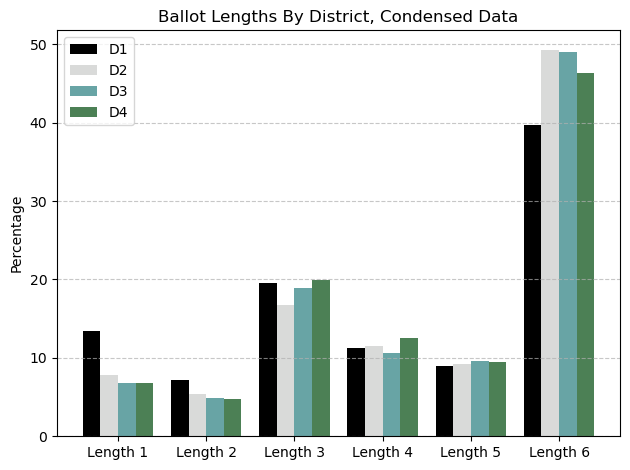

In [20]:
#Ballot Length by district, cleaned data
#Not using condensed data because it takes a ballot like "UWI, UWI" and makes it UWI
import pandas as pd
#District 1, cleaned
data = pd.read_csv('Portland_D1_cleaned.csv')
D1_lengths=[0,0,0,0,0,0]

for t in range(len(data)):
    write_in_count=0
    my_list=list(data.iloc[t])
    for v in range(len(my_list)):
        if my_list[v]=='Uncertified Write In':
            write_in_count+=1
    my_list=list(set(list(data.iloc[t]))) 
    if 'Uncertified Write In' in my_list:
        my_list.remove('Uncertified Write In')
    if 'skipped' in my_list:
        my_list.remove('skipped')
    #print(my_list)
    #print(len(my_list))
    if len(my_list)+write_in_count>0:
        D1_lengths[len(my_list)+write_in_count-1]+=1
print(D1_lengths)

data = pd.read_csv('Portland_D2_cleaned.csv')
D2_lengths=[0,0,0,0,0,0]
for t in range(len(data)):
    write_in_count=0
    my_list=list(data.iloc[t])
    for v in range(len(my_list)):
        if my_list[v]=='Uncertified Write In':
            write_in_count+=1
    my_list=list(set(list(data.iloc[t]))) 
    if 'Uncertified Write In' in my_list:
        my_list.remove('Uncertified Write In')
    if 'skipped' in my_list:
        my_list.remove('skipped')
    #print(my_list)
    #print(len(my_list))
    if len(my_list)+write_in_count>0:
        D2_lengths[len(my_list)+write_in_count-1]+=1
print(D2_lengths)

data = pd.read_csv('Portland_D3_cleaned.csv')
D3_lengths=[0,0,0,0,0,0]
for t in range(len(data)):
    write_in_count=0
    my_list=list(data.iloc[t])
    for v in range(len(my_list)):
        if my_list[v]=='Uncertified Write In':
            write_in_count+=1
    my_list=list(set(list(data.iloc[t]))) 
    if 'Uncertified Write In' in my_list:
        my_list.remove('Uncertified Write In')
    if 'skipped' in my_list:
        my_list.remove('skipped')
    #print(my_list)
    #print(len(my_list))
    if len(my_list)+write_in_count>0:
        D3_lengths[len(my_list)+write_in_count-1]+=1
print(D3_lengths)

data = pd.read_csv('Portland_D4_cleaned.csv')
D4_lengths=[0,0,0,0,0,0]
for t in range(len(data)):
    write_in_count=0
    my_list=list(data.iloc[t])
    for v in range(len(my_list)):
        if my_list[v]=='Uncertified Write In':
            write_in_count+=1
    my_list=list(set(list(data.iloc[t]))) 
    if 'Uncertified Write In' in my_list:
        my_list.remove('Uncertified Write In')
    if 'skipped' in my_list:
        my_list.remove('skipped')
    #print(my_list)
    #print(len(my_list))
    if len(my_list)+write_in_count>0:
        D4_lengths[len(my_list)+write_in_count-1]+=1
print(D4_lengths)
        
overall_lengths=[a+b+c+d for a,b,c,d in zip(D1_lengths,D2_lengths,D3_lengths,D4_lengths)]
print(overall_lengths)

D1_percents=[i/sum(D1_lengths)*100 for i in D1_lengths]
D2_percents=[i/sum(D2_lengths)*100 for i in D2_lengths]
D3_percents=[i/sum(D3_lengths)*100 for i in D3_lengths]
D4_percents=[i/sum(D4_lengths)*100 for i in D4_lengths]
overall_percents=[i/sum(overall_lengths)*100 for i in overall_lengths]
print(D1_percents)
print(D2_percents)
print(D3_percents)
print(D4_percents)
print(overall_percents)

import matplotlib.pyplot as plt
import numpy as np


# Define labels and group positions
labels = ['Length 1', 'Length 2', 'Length 3', 'Length 4', 'Length 5', 'Length 6']
x = np.arange(len(labels))  # Group positions

# Bar width and offsets
bar_width = 0.2
offsets = [-1.5, -0.5, 0.5, 1.5]
colors=['black','#D9DAD9','#68A4A5','#4C8055']
# Plot each list as a separate set of bars
plt.bar(x + offsets[0] * bar_width, D1_percents, width=bar_width, color=colors[0], label='D1')
plt.bar(x + offsets[1] * bar_width, D2_percents, width=bar_width, color=colors[1],label='D2')
plt.bar(x + offsets[2] * bar_width, D3_percents, width=bar_width, color=colors[2],label='D3')
plt.bar(x + offsets[3] * bar_width, D4_percents, width=bar_width, color=colors[3],label='D4')

# Add labels, legend, and grid
#plt.xlabel('Groups')
plt.ylabel('Percentage')
plt.title('Ballot Lengths By District, Condensed Data')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig('ballot_lengths_by_district_condensed.png',dpi=500)
plt.show()



[5774, 3022, 8492, 4851, 3712, 17818]
[6108, 4109, 13008, 8888, 7043, 38530]
[5966, 4221, 15973, 9008, 8094, 41853]
[5465, 3728, 15353, 9664, 7229, 35893]
[23313, 15080, 52826, 32411, 26078, 134094]
[13.222194233895898, 6.920240903157847, 19.446289129588497, 11.108566717808973, 8.50030914378621, 40.80239987176258]
[7.862420513348608, 5.289241304739592, 16.74432973766187, 11.440928867492211, 9.065983574904102, 49.597096001853615]
[7.00934030429419, 4.959172883745521, 18.766374904540914, 10.583328437995652, 9.509487164424602, 49.17229630499912]
[7.066932188486009, 4.820772771944344, 19.853359540681737, 12.496767185641131, 9.34800600010345, 46.41416231314333]
[8.214529848274502, 5.313563681721764, 18.61368136940543, 11.420285974024145, 9.188800642701601, 47.249138483872564]


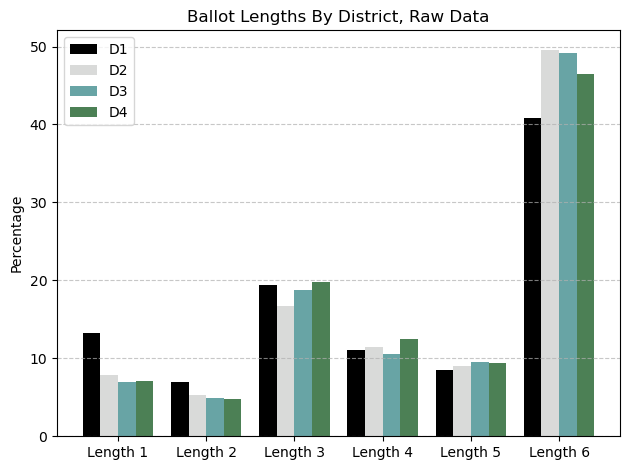

In [24]:
#Ballot Length, raw data
#We still ignore skips, but each overvote counts toward the length
import pandas as pd
#District 1, raw
data = pd.read_csv('Portland_D1_Raw.csv')
D1_lengths=[0,0,0,0,0,0]
for t in range(len(data)):
    over_count=0
    my_list=list(data.iloc[t][10:])
    
    for vv in range(len(my_list)):
        if my_list[vv]=='overvote':
            over_count+=1

    write_in_count=0
    my_list=list(data.iloc[t][10:])
    for vv in range(len(my_list)):
        if 'Write' in my_list[vv]or 'write' in my_list[vv]:
            write_in_count+=1
    #if write_in_count>0:
    #    print(my_list)
    
    cands_to_remove=[]
    for cand in my_list:
        if 'Write' in cand or 'write' in cand:
            cands_to_remove.append(cand)
    my_list=list(set(list(data.iloc[t][10:])))



    for cand in cands_to_remove:
        if cand in my_list:
            my_list.remove(cand)
    if 'skipped' in my_list:
        my_list.remove('skipped')
    if 'overvote' in my_list:
        my_list.remove('overvote')
    #print(my_list)
    #print(len(my_list))
    length=over_count+len(my_list)+write_in_count
    #if write_in_count>0:
    #    print(length)
    if length>0:
        D1_lengths[length-1]+=1
    
print(D1_lengths)

data = pd.read_csv('Portland_D2_Raw.csv')
D2_lengths=[0,0,0,0,0,0]
for t in range(len(data)):
    over_count=0
    my_list=list(data.iloc[t][10:])
    for vv in range(len(my_list)):
        if my_list[vv]=='overvote':
            over_count+=1

    write_in_count=0
    my_list=list(data.iloc[t][10:])
    for vv in range(len(my_list)):
        if 'Write' in my_list[vv]or 'write' in my_list[vv]:
            write_in_count+=1
    
    cands_to_remove=[]
    for cand in my_list:
        if 'Write' in cand or 'write' in cand:
            cands_to_remove.append(cand)
    my_list=list(set(list(data.iloc[t][10:])))

    for cand in cands_to_remove:
        if cand in my_list:
            my_list.remove(cand)
    if 'skipped' in my_list:
        my_list.remove('skipped')
    if 'overvote' in my_list:
        my_list.remove('overvote')
    #print(my_list)
    #print(len(my_list))
    length=over_count+len(my_list)+write_in_count
    if length>0:
        D2_lengths[length-1]+=1
print(D2_lengths)

data = pd.read_csv('Portland_D3_Raw.csv')
D3_lengths=[0,0,0,0,0,0]
for t in range(len(data)):
    over_count=0
    my_list=list(data.iloc[t][10:])
    for vv in range(len(my_list)):
        if my_list[vv]=='overvote':
            over_count+=1

    write_in_count=0
    my_list=list(data.iloc[t][10:])
    for vv in range(len(my_list)):
        if 'Write' in my_list[vv]or 'write' in my_list[vv]:
            write_in_count+=1
    
    cands_to_remove=[]
    for cand in my_list:
        if 'Write' in cand or 'write' in cand:
            cands_to_remove.append(cand)
    my_list=list(set(list(data.iloc[t][10:])))

    for cand in cands_to_remove:
        if cand in my_list:
            my_list.remove(cand)
    if 'skipped' in my_list:
        my_list.remove('skipped')
    if 'overvote' in my_list:
        my_list.remove('overvote')
    #print(my_list)
    #print(len(my_list))
    length=over_count+len(my_list)+write_in_count
    if length>0:
        D3_lengths[length-1]+=1
print(D3_lengths)

data = pd.read_csv('Portland_D4_Raw.csv')
D4_lengths=[0,0,0,0,0,0]
for t in range(len(data)):
    over_count=0
    my_list=list(data.iloc[t][10:])
    for vv in range(len(my_list)):
        if my_list[vv]=='overvote':
            over_count+=1

    write_in_count=0
    my_list=list(data.iloc[t][10:])
    for vv in range(len(my_list)):
        if 'Write' in my_list[vv]or 'write' in my_list[vv]:
            write_in_count+=1
    
    cands_to_remove=[]
    for cand in my_list:
        if 'Write' in cand or 'write' in cand:
            cands_to_remove.append(cand)
    my_list=list(set(list(data.iloc[t][10:])))

    for cand in cands_to_remove:
        if cand in my_list:
            my_list.remove(cand)
    if 'skipped' in my_list:
        my_list.remove('skipped')
    if 'overvote' in my_list:
        my_list.remove('overvote')
    #print(my_list)
    #print(len(my_list))
    length=over_count+len(my_list)+write_in_count
    if length>0:
        D4_lengths[length-1]+=1
print(D4_lengths)
overall_lengths=[a+b+c+d for a,b,c,d in zip(D1_lengths,D2_lengths,D3_lengths,D4_lengths)]
print(overall_lengths)
D1_percents=[i/sum(D1_lengths)*100 for i in D1_lengths]
D2_percents=[i/sum(D2_lengths)*100 for i in D2_lengths]
D3_percents=[i/sum(D3_lengths)*100 for i in D3_lengths]
D4_percents=[i/sum(D4_lengths)*100 for i in D4_lengths]
overall_percents=[i/sum(overall_lengths)*100 for i in overall_lengths]
print(D1_percents)
print(D2_percents)
print(D3_percents)
print(D4_percents)
print(overall_percents)

import matplotlib.pyplot as plt
import numpy as np


# Define labels and group positions
labels = ['Length 1', 'Length 2', 'Length 3', 'Length 4', 'Length 5', 'Length 6']
x = np.arange(len(labels))  # Group positions

# Bar width and offsets
bar_width = 0.2
offsets = [-1.5, -0.5, 0.5, 1.5]
colors=['black','#D9DAD9','#68A4A5','#4C8055']
# Plot each list as a separate set of bars
plt.bar(x + offsets[0] * bar_width, D1_percents, width=bar_width, color=colors[0], label='D1')
plt.bar(x + offsets[1] * bar_width, D2_percents, width=bar_width, color=colors[1],label='D2')
plt.bar(x + offsets[2] * bar_width, D3_percents, width=bar_width, color=colors[2],label='D3')
plt.bar(x + offsets[3] * bar_width, D4_percents, width=bar_width, color=colors[3],label='D4')

# Add labels, legend, and grid
#plt.xlabel('Groups')
plt.ylabel('Percentage')
plt.title('Ballot Lengths By District, Raw Data')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig('ballot_lenghths_by_district_raw.png',dpi=500)
plt.show()



In [27]:
#overvote errors and confusion results
import pandas as pd
#District 1, raw
data = pd.read_csv('Portland_D1_Raw_UWI.csv')
D1_count_over=0
D1_count_confused=0
#D1_count_both=0
D1_num_voters=len(data)
for t in range(len(data)):
    over_count=0
    confusion_count=0
    my_list=list(data.iloc[t][10:])
    found_overvote=False
    found_confusion=False
    if 'overvote' in my_list:
        found_overvote=True
        
        D1_count_over+=1
        
    first_skip_pos=-1
    for k in range(len(my_list)):
        if my_list[k]=='skipped':
            first_skip_pos=k
            break
    skip_confused=False
    if first_skip_pos>-1:
        for k in range(first_skip_pos+1,len(my_list)):
            if my_list[k]!='skipped':
                
                skip_confused=True
                #D1_count_confused+=1
                break
    repeat_confused=False
    new_list=[]
    for k in range(len(my_list)):
        new_list.append(my_list[k])
    #new_list=my_list.copy()
    while 'UWI' in new_list:
        new_list.remove('UWI')
    while 'overvote' in new_list:
        new_list.remove('overvote')
    while 'skipped' in new_list:
        new_list.remove('skipped')
    if len(set(new_list))!=len(new_list):
        repeat_confused=True
        
    if found_overvote or skip_confused or repeat_confused:
        #print(my_list)
        D1_count_confused+=1
    
data = pd.read_csv('Portland_D2_Raw_UWI.csv')
D2_count_over=0
D2_count_confused=0
#D1_count_both=0
D2_num_voters=len(data)
for t in range(len(data)):
    over_count=0
    confusion_count=0
    my_list=list(data.iloc[t][10:])
    found_overvote=False
    found_confusion=False
    if 'overvote' in my_list:
        found_overvote=True
        
        D2_count_over+=1
        
    first_skip_pos=-1
    for k in range(len(my_list)):
        if my_list[k]=='skipped':
            first_skip_pos=k
            break
    skip_confused=False
    if first_skip_pos>-1:
        for k in range(first_skip_pos+1,len(my_list)):
            if my_list[k]!='skipped':
                
                skip_confused=True
                #D1_count_confused+=1
                break
    repeat_confused=False
    new_list=[]
    for k in range(len(my_list)):
        new_list.append(my_list[k])
    #new_list=my_list.copy()
    while 'UWI' in new_list:
        new_list.remove('UWI')
    while 'overvote' in new_list:
        new_list.remove('overvote')
    while 'skipped' in new_list:
        new_list.remove('skipped')
    if len(set(new_list))!=len(new_list):
        repeat_confused=True
        
    if found_overvote or skip_confused or repeat_confused:
        #print(my_list)
        D2_count_confused+=1

data = pd.read_csv('Portland_D3_Raw_UWI.csv')
D3_count_over=0
D3_count_confused=0
#D1_count_both=0
D3_num_voters=len(data)
for t in range(len(data)):
    over_count=0
    confusion_count=0
    my_list=list(data.iloc[t][10:])
    found_overvote=False
    found_confusion=False
    if 'overvote' in my_list:
        found_overvote=True
        
        D3_count_over+=1
        
    first_skip_pos=-1
    for k in range(len(my_list)):
        if my_list[k]=='skipped':
            first_skip_pos=k
            break
    skip_confused=False
    if first_skip_pos>-1:
        for k in range(first_skip_pos+1,len(my_list)):
            if my_list[k]!='skipped':
                
                skip_confused=True
                #D1_count_confused+=1
                break
    repeat_confused=False
    new_list=[]
    for k in range(len(my_list)):
        new_list.append(my_list[k])
    #new_list=my_list.copy()
    while 'UWI' in new_list:
        new_list.remove('UWI')
    while 'overvote' in new_list:
        new_list.remove('overvote')
    while 'skipped' in new_list:
        new_list.remove('skipped')
    if len(set(new_list))!=len(new_list):
        repeat_confused=True
        
    if found_overvote or skip_confused or repeat_confused:
        #print(my_list)
        D3_count_confused+=1
        
data = pd.read_csv('Portland_D4_Raw_UWI.csv')
D4_count_over=0
D4_count_confused=0
#D1_count_both=0
D4_num_voters=len(data)
for t in range(len(data)):
    over_count=0
    confusion_count=0
    my_list=list(data.iloc[t][10:])
    found_overvote=False
    found_confusion=False
    if 'overvote' in my_list:
        found_overvote=True
        
        D4_count_over+=1
        
    first_skip_pos=-1
    for k in range(len(my_list)):
        if my_list[k]=='skipped':
            first_skip_pos=k
            break
    skip_confused=False
    if first_skip_pos>-1:
        for k in range(first_skip_pos+1,len(my_list)):
            if my_list[k]!='skipped':
                
                skip_confused=True
                #D1_count_confused+=1
                break
    repeat_confused=False
    new_list=[]
    for k in range(len(my_list)):
        new_list.append(my_list[k])
    #new_list=my_list.copy()
    while 'UWI' in new_list:
        new_list.remove('UWI')
    while 'overvote' in new_list:
        new_list.remove('overvote')
    while 'skipped' in new_list:
        new_list.remove('skipped')
    if len(set(new_list))!=len(new_list):
        repeat_confused=True
        
    if found_overvote or skip_confused or repeat_confused:
        #print(my_list)
        D4_count_confused+=1

print('overvote results')
print(D1_count_over,D2_count_over,D3_count_over,D4_count_over)
print(D1_count_over/D1_num_voters*100,D2_count_over/D2_num_voters*100,D3_count_over/D3_num_voters*100,D4_count_over/D4_num_voters*100)

print('confusion results')
print(D1_count_confused,D2_count_confused,D3_count_confused,D4_count_confused)
print(D1_count_confused/D1_num_voters*100,D2_count_confused/D2_num_voters*100,D3_count_confused/D3_num_voters*100,D4_count_confused/D4_num_voters*100)

#print('both results')
#print(D1_count_both,D2_count_both,D3_count_both,D4_count_both)
#print(D1_count_both/D1_num_voters*100,D2_count_both/D2_num_voters*100,D3_count_both/D3_num_voters*100,D4_count_both/D4_num_voters*100)



overvote results
1474 1026 968 970
3.375392154617692 1.3207012846587545 1.1372848499089467 1.2543319712408834
confusion results
2566 2073 1934 1762
5.876021891959972 2.6684344669567235 2.272219937731305 2.278487560130347


In [ ]:
#overvote and error results NYC 2021
import os
directory='Desktop/untitled folder'
fill_in_ballots=False
r=[]
subdirs = [x[0] for x in os.walk(directory)]
subdirs=subdirs[1:]
#print(subdirs)
total_elections=0
come_from_behind=0
come_from_behind_with_paradox=0
count=0
num_profile_too_small=0
majority_count=0
for subdir in subdirs:
    files=os.listdir(subdir)
    #print(files)
    for file in files:
        
        filename=subdir+'/'+file 
        if 'DS_Store' not in filename:
            
            data = pd.read_csv(filename)
            cands=list(data['rank1'].unique())
            if 'skipped' in cands:
                cands.remove('skipped')
            if 'overvote' in cands:
                cands.remove('overvote')
                
            if len(cands)>9:
                overvote_count=0
                confused_count=0
                num_voters=0
                
                for t in range(len(data)):
                    
                    my_list=list(data.iloc[t][3:])
                    
                    for l in range(len(my_list)):
                        if my_list[l]!='skipped':
                            num_voters+=1
                            break
                    found_overvote=False
                    found_confusion=False
                    if 'overvote' in my_list:
                        found_overvote=True
                        
                        overvote_count+=1
                        
                    first_skip_pos=-1
                    for k in range(len(my_list)):
                        if my_list[k]=='skipped':
                            first_skip_pos=k
                            break
                    skip_confused=False
                    if first_skip_pos>-1:
                        for k in range(first_skip_pos+1,len(my_list)):
                            if my_list[k]!='skipped':
                                
                                skip_confused=True
                                #D1_count_confused+=1
                                break
                    repeat_confused=False
                    new_list=[]
                    for k in range(len(my_list)):
                        new_list.append(my_list[k])
                    #new_list=my_list.copy()
                    while 'writein' in new_list:
                        new_list.remove('writein')
                    while 'overvote' in new_list:
                        new_list.remove('overvote')
                    while 'skipped' in new_list:
                        new_list.remove('skipped')
                    if len(set(new_list))!=len(new_list):
                        repeat_confused=True
                        
                    if found_overvote or skip_confused or repeat_confused:
                        #print(my_list)
                        confused_count+=1
                print(filename)
                print('num cands',len(cands))
                print('num voters', num_voters)
                print('overvote results', overvote_count/num_voters*100)
                print('confused results', confused_count/num_voters*100)
                print('\n')
            

rank2               Carmen Rubio  Durrell Kinsey Bey  Keith Wilson  \
rank1                                                                
Carmen Rubio                 0.0              1018.0       29542.0   
Durrell Kinsey Bey         437.0                 0.0         318.0   
Keith Wilson             35195.0               500.0           0.0   
Liv (Viva) Osthus         6039.0               536.0        5511.0   
Mingus Mapps              8487.0               247.0        9229.0   
Rene Gonzalez             4832.0               129.0       12665.0   

rank2               Liv (Viva) Osthus  Mingus Mapps  Rene Gonzalez  skipped  
rank1                                                                        
Carmen Rubio                  11063.0       12019.0         4209.0   6823.0  
Durrell Kinsey Bey              497.0         136.0           87.0    280.0  
Keith Wilson                  11725.0       21557.0        14397.0  14155.0  
Liv (Viva) Osthus                 0.0        1882

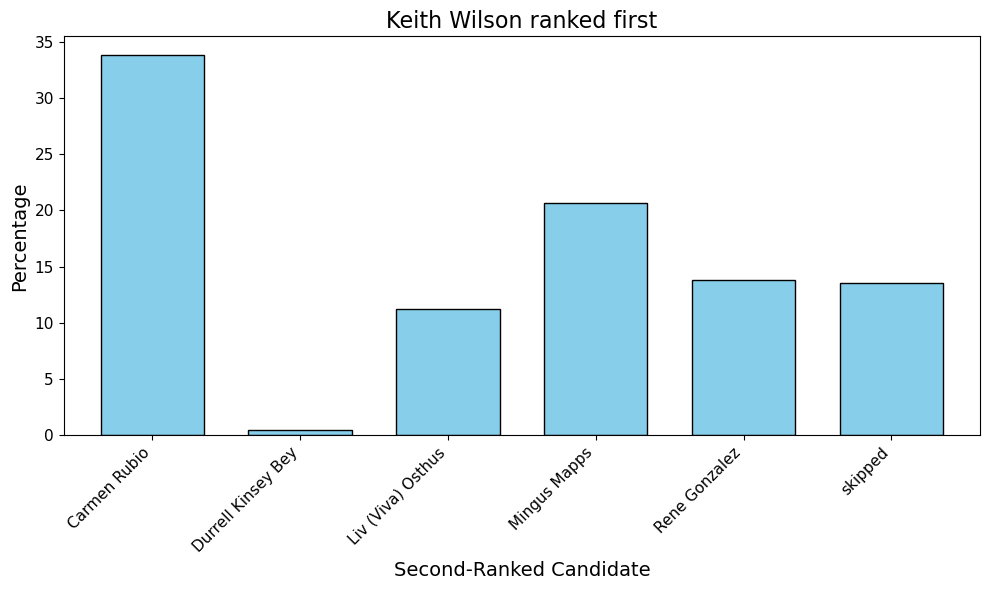

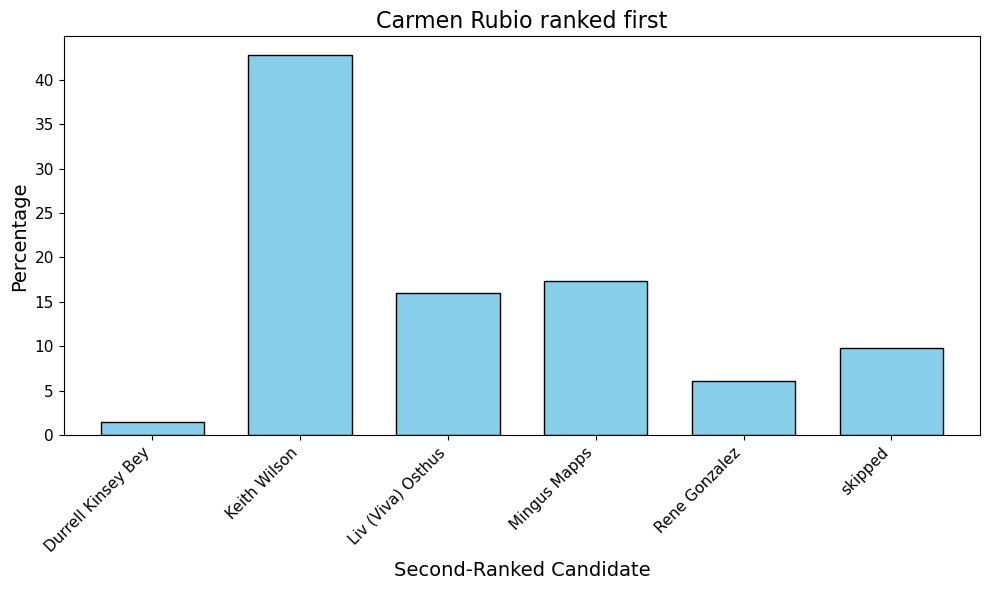

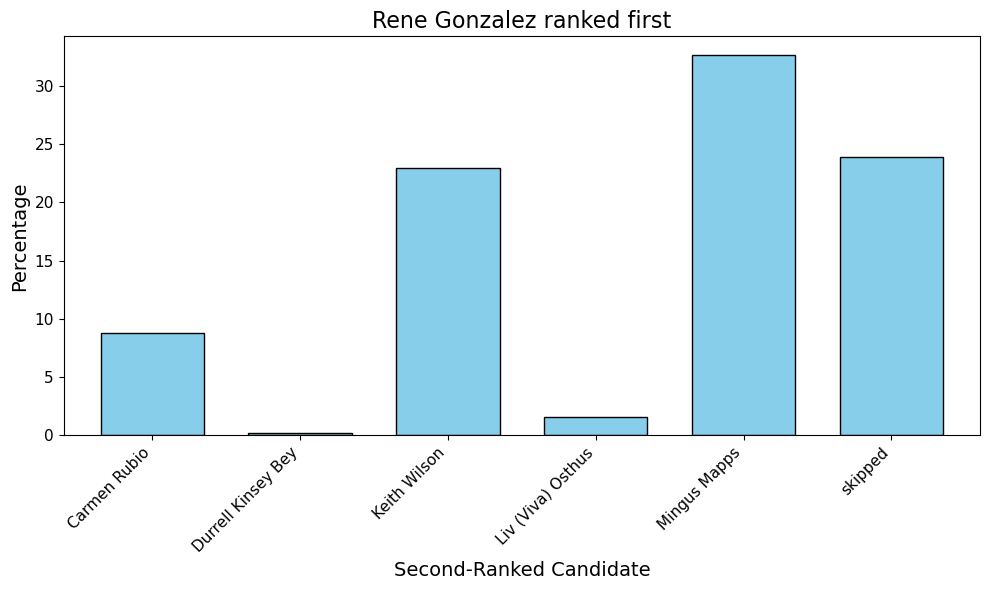

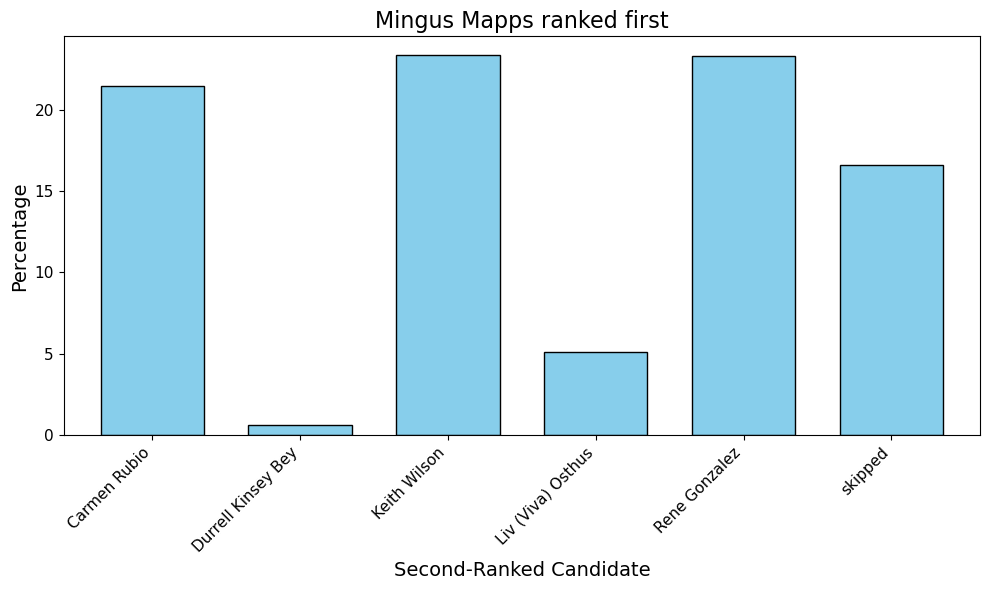

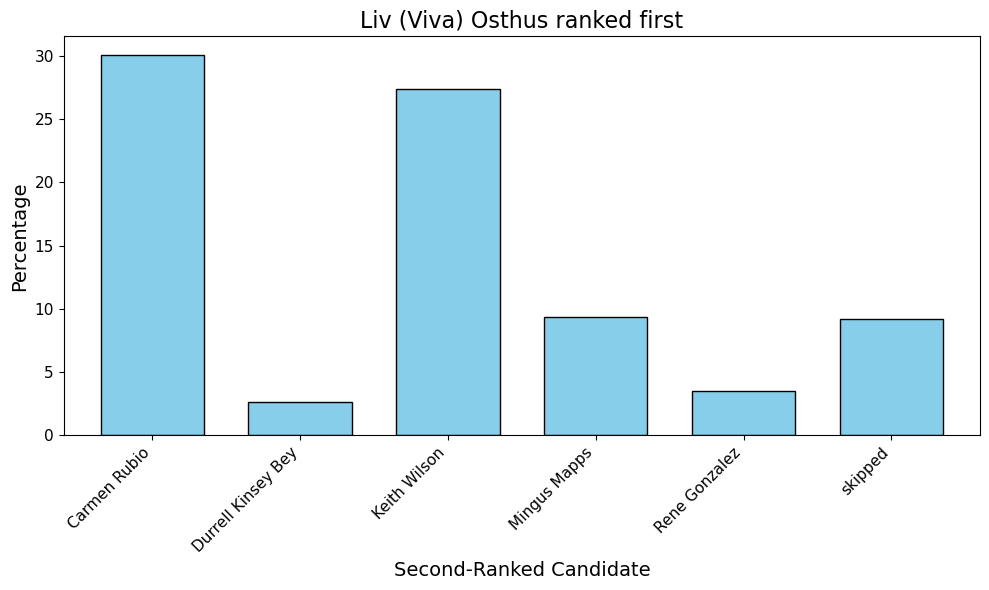

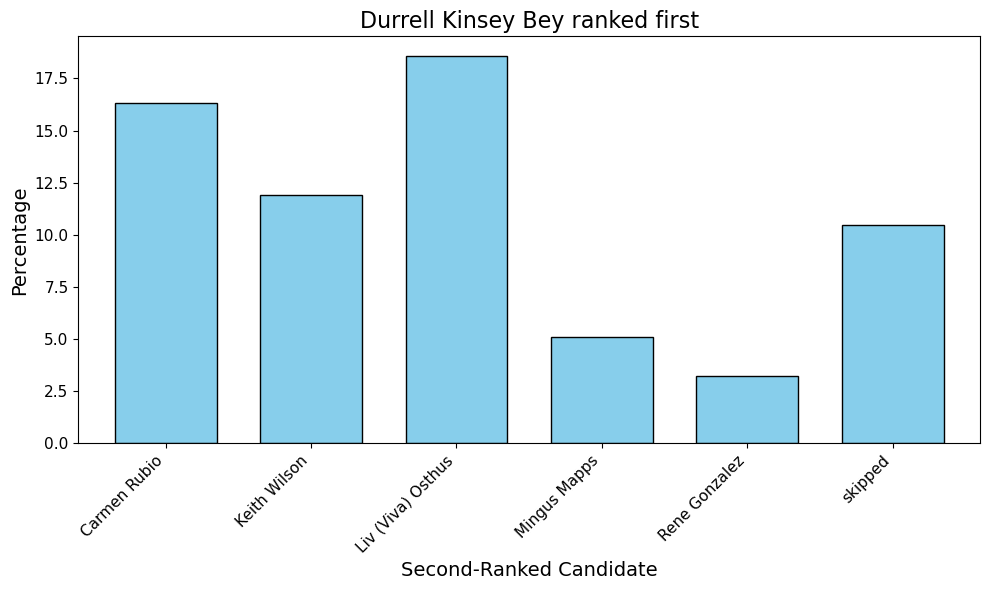

In [43]:
#Mayor similarity histograms
import pandas as pd

# Load the data
data = pd.read_csv('PortlandOR_110524_Mayor.csv')

#D2 cands
#candidates_of_interest = ['Elana Pirtle-Guiney','Dan Ryan','Sameer Kanal','Tiffani Penson','Michelle DePass','Nat West','Marnie Glickman','Jonathan Tasini','Bob Simril','skipped']

#D3 cands
#candidates_of_interest = ['Steve Novick','Angelita Morillo','Tiffany Koyama Lane','Kezia Wanner','Rex Burkholder','Jesse Cornett','Harrison Kass','skipped']

#D4 cands
#candidates_of_interest = ['Olivia Clark','Mitch Green','Eli Arnold','Eric Zimmerman','Chad Lykins','Sarah Silkie','Bob Weinstein','Lisa Freeman','skipped']

#D1 cands
#candidates_of_interest = ['Candace Avalos','Loretta Smith','Jamie Dunphy','Noah Ernst','Terrence Hayes','Steph Routh','Timur Ender','skipped']

#mayoral candidates
candidates_of_interest=['Keith Wilson','Carmen Rubio','Rene Gonzalez','Mingus Mapps','Liv (Viva) Osthus','Durrell Kinsey Bey','skipped']

# Define the candidates of interest

# Filter rows where rank1 or rank2 matches the candidates of interest
filtered_data = data[data['rank1'].isin(candidates_of_interest) & 
                     data['rank2'].isin(candidates_of_interest)]

# Groupby and count occurrences of each rank1 and rank2 combination
counts = filtered_data.groupby(['rank1', 'rank2']).size().reset_index(name='count')

# Pivot the table
pivot_table = counts.pivot(index='rank1', columns='rank2', values='count').fillna(0)

# Save or display the results
print(pivot_table)

# Optionally, write the pivot table to a CSV for further analysis
#pivot_table.to_csv('D1_rank1_info.csv')


import matplotlib.pyplot as plt

# Define the candidate to analyze
for cand in candidates_of_interest:
    if cand!='skipped':
        target_candidate = cand
        
        # Get the row corresponding to the target candidate
        target_row = pivot_table.loc[target_candidate]
        
        # Calculate percentages for each second-choice candidate
        total_first_choices = 0
        for k in range(len(data)):
            if data.at[k,'rank1']==target_candidate:
                total_first_choices+=1# Total voters who ranked the target candidate first
        percentages = (target_row / total_first_choices) * 100
        
        # Filter out 'skipped' if it exists
        percentages = percentages.drop(labels=target_candidate, errors='ignore')
        
        # Plot the histogram
        plt.figure(figsize=(10, 6))
        percentages.plot(kind='bar', color='skyblue', edgecolor='black', width=0.7)  # Adjust bar width here
        plt.title(f"{target_candidate} ranked first", fontsize=16)  # Adjust title font size
        plt.xlabel("Second-Ranked Candidate", fontsize=14)  # Adjust x-axis label font size
        plt.ylabel("Percentage", fontsize=14)  # Adjust y-axis label font size
        plt.xticks(rotation=45, ha='right', fontsize=11)  # Adjust x-axis tick label font size
        plt.yticks(fontsize=11)  # Adjust y-axis tick label font size
        plt.tight_layout()
        plt.savefig('Desktop/Portland images/Mayor '+target_candidate+' rank1.png')
        plt.show()





In [ ]:
#representation score
#maximize representation

import pandas as pd
#winners under various methods
data = pd.read_csv('Portland_D4_2024.csv')
#print(data)
#Find the number of candidates that a voter can rank.
#If a voter is allowed to rank up to 5 candidates, trunc_level becomes 5, for example.
trunc_level=0
for column in data.columns:
    if "rank" in column:
        trunc_level+=1
print(trunc_level)
#print(data)
#Create list of candidates in terms of 0, 1, ...
cands_tot=data['rank1'].unique().tolist()
for l in range(2, trunc_level+1):
    m=data['rank'+str(l)].unique().tolist()
    cands_tot+=m
cands=list(set(cands_tot))
cands_key=list(set(cands_tot))

if 'XXX' in cands:
    cands.remove('XXX')
    data=data.replace('XXX', 'skipped')
if 'UWI' in cands:
    cands.remove('UWI')
    data=data.replace('UWI', 'skipped')
if 'undervote' in cands:
    cands.remove('undervote')
    data=data.replace('undervote', 'skipped')
if '0000000' in cands:
    cands.remove('0000000')
    data=data.replace('0000000', 'skipped')
if 'overvote' in cands:
    cands.remove('overvote')
    data=data.replace('overvote', 'skipped')
if 'skipped' in cands:
    cands.remove('skipped')
if 'overvote' in cands:
    cands.remove('overvote')
#if 'Write-in' in cands:
#    cands.remove('Write-in')
num_cands=0
#print(cands)
for cand in cands:
    if 'Write' not in cand and 'write' not in cand:
        num_cands+=1
#print(num_cands)
#print(filename)
if num_cands>2:
    
    #clean overs and unders
    #Different municipalities uses different ways to denote a blank ranking on a ballot.
    #A blank ranking is called an "undervote", and is denoted as XXX, undervote, under, or 0000000 depending on the election source.
    #We don't want to count blank rankings or an overvote as one of our candidates.



    #NEED TO HANDLE Write-in or writein

    #print(cands)
    #create a dictionary of the candidates.
    cands_dict={}
    for k in range(len(cands)):
        cands_dict[k]=cands[k]
        data=data.replace(cands[k],k)

    #n is the number of candidates in the election, including write-ins. We discount write-in candidates
    #in our analysis.
    n=len(cands)



    #This next large chunk of code creates a streamlined version of the CVR, where blank rankings are ignored
    #and a Count column is created to combine voters who voted the same way. 
    if 'Count' not in data.columns:
        counts=[]
        for k in range(len(data)):
            counts.append(1)
        data['Count']=counts
        df=pd.DataFrame(data.groupby(["rank"+str(l) for l in range(1,trunc_level+1)],as_index=False)['Count'].sum())

    else:
        df=pd.DataFrame(data.groupby(["rank"+str(l) for l in range(1,trunc_level+1)],as_index=False)['Count'].sum())




    cands_num=[i for i in range(n)]

    #don't mess with original df
    df2=pd.DataFrame.copy(df)

    #remove "overs" and replace with -1 there and everywhere after
    for i in range(len(df2)):
        over_pos=-1
        for l in range(1,trunc_level+1):

            if df2.iloc[i]["rank"+str(l)]=="over":
                over_pos=l
                break

        if over_pos>-1:        
            for l in range(over_pos,trunc_level+1):
                #print(df2.at[i,"choice "+str(l)])
                df2.at[i,"rank"+str(l)]= -1
                #df2.at[i,"choice "+str(l)]=str(df2.at[i,"choice "+str(l)])
                #df2.at[i,"choice "+str(l)]='under'

    #replace all the -1's with under            
    df2=df2.replace(-1,'skipped')

    #convert to list of rows
    df2_list=df2.values.tolist()

    #remove duplicates
    duplicates_removed=[]
    for row in df2_list:
        i=1
        while i<len(row)-1:
            if row[i] in row[0:i]:
                row[i]="skipped"
                i+=1
            else:
                i+=1
        duplicates_removed.append(row) 

    #return to dataframe    
    clean_df=pd.DataFrame(duplicates_removed, columns=df2.columns)

    clean_df=pd.DataFrame(clean_df.groupby(["rank"+str(l) for l in range(1,trunc_level+1)],as_index=False)['Count'].sum())

    #At this point in the code, clean_df is the streamlined, cleaned-up version of the CVR.

    #print(clean_df)

    #build dictionary of ballots and votes, shift unders to the end

    actual_votes={key: [[], clean_df["Count"][key]] for key in range(len(clean_df))}
    for i in range(len(clean_df)):
        for j in range(0, trunc_level):
            if clean_df.loc[i, "rank"+str(j+1)]!="skipped":
                actual_votes[i][0].append(clean_df.loc[i, "rank"+str(j+1)]) 
    for i in actual_votes:
        if len(actual_votes[i][0])<trunc_level:
            last=actual_votes[i][0]
            more=["skipped" for i in range(trunc_level-len(actual_votes[i][0]))]
            actual_votes[i][0]=last+more


    #adjusted dataframe with unders shifted right
    to_dataframe=[]
    for i in range(len(clean_df)):
        to_dataframe.append(actual_votes[i][0]+[actual_votes[i][1]])
    #print(to_dataframe)    

    #adjusted dataframe with unders shifted right and under row eliminated
    clean_df=pd.DataFrame(to_dataframe, columns=clean_df.columns)
    under_row=["skipped" for j in range(trunc_level)]

    for key in actual_votes:
        if under_row==actual_votes[key][0]: 
            clean_df=clean_df.drop(key)
    for t in range(len(clean_df)):
        pos=-1
        #print(clean_df.iloc[t])
        for tt in range(1,trunc_level+1):
            if clean_df.at[t,'rank'+str(tt)]=='overvote':
                pos=tt
        if pos>-1 and pos<trunc_level:
            for tt in range(pos+1,trunc_level+1):
                clean_df.at[t,'rank'+str(tt)]='skipped'
    clean_df=pd.DataFrame(clean_df.groupby(["rank"+str(l) for l in range(1,trunc_level+1)],as_index=False)['Count'].sum())


    #clean_df.to_csv('sample.csv')

    candidates=[i for i in range(len(cands))]
    votes={}
    for cand in candidates:
        votes[cand]=0
    
    for t in range(len(clean_df)):
        if clean_df.at[t,'rank1']!='over' and clean_df.at[t,'rank1']!='skipped':
            votes[clean_df.at[t,'rank1']]+=clean_df.at[t,'Count']



    column_names=['ballot','Count']
    profile=pd.DataFrame(columns = column_names)
    for t in range(len(clean_df)):
        if clean_df.at[t,'rank1']!='over' and clean_df.at[t,'rank1']!='skipped':
            ballot=''
            for z in range(1,trunc_level+1):
                if clean_df.at[t,'rank'+str(z)]==0:
                    ballot+='A'
                if clean_df.at[t,'rank'+str(z)]==1:
                    ballot+='B'
                if clean_df.at[t,'rank'+str(z)]==2:
                    ballot+='C'
                if clean_df.at[t,'rank'+str(z)]==3:
                    ballot+='D'
                if clean_df.at[t,'rank'+str(z)]==4:
                    ballot+='E'
                if clean_df.at[t,'rank'+str(z)]==5:
                    ballot+='F'
                if clean_df.at[t,'rank'+str(z)]==6:
                    ballot+='G'
                if clean_df.at[t,'rank'+str(z)]==7:
                    ballot+='H'
                if clean_df.at[t,'rank'+str(z)]==8:
                    ballot+='I'
                if clean_df.at[t,'rank'+str(z)]==9:
                    ballot+='J'
                if clean_df.at[t,'rank'+str(z)]==10:
                    ballot+='K'
                if clean_df.at[t,'rank'+str(z)]==11:
                    ballot+='L'
                if clean_df.at[t,'rank'+str(z)]==12:
                    ballot+='M'
                if clean_df.at[t,'rank'+str(z)]==13:
                    ballot+='N'
                if clean_df.at[t,'rank'+str(z)]==14:
                    ballot+='O'
                if clean_df.at[t,'rank'+str(z)]==15:
                    ballot+='P'
                if clean_df.at[t,'rank'+str(z)]==16:
                    ballot+='Q'
                if clean_df.at[t,'rank'+str(z)]==17:
                    ballot+='R'
                if clean_df.at[t,'rank'+str(z)]==18:
                    ballot+='S'
                if clean_df.at[t,'rank'+str(z)]==19:
                    ballot+='T'
                if clean_df.at[t,'rank'+str(z)]==20:
                    ballot+='U'
                if clean_df.at[t,'rank'+str(z)]==21:
                    ballot+='V'
                if clean_df.at[t,'rank'+str(z)]==22:
                    ballot+='W'
                if clean_df.at[t,'rank'+str(z)]==23:
                    ballot+='X'
                if clean_df.at[t,'rank'+str(z)]==24:
                    ballot+='Y'
                if clean_df.at[t,'rank'+str(z)]==25:
                    ballot+='Z'
                if clean_df.at[t,'rank'+str(z)]==26:
                    ballot+='a'
                if clean_df.at[t,'rank'+str(z)]==27:
                    ballot+='b'
                if clean_df.at[t,'rank'+str(z)]==28:
                    ballot+='c'
                if clean_df.at[t,'rank'+str(z)]==29:
                    ballot+='d'
                if clean_df.at[t,'rank'+str(z)]==30:
                    ballot+='e'
                if clean_df.at[t,'rank'+str(z)]==31:
                    ballot+='f'
                if clean_df.at[t,'rank'+str(z)]==32:
                    ballot+='g'
                if clean_df.at[t,'rank'+str(z)]==33:
                    ballot+='h'
                if clean_df.at[t,'rank'+str(z)]==34:
                    ballot+='i'
                if clean_df.at[t,'rank'+str(z)]==35:
                    ballot+='j'
                if clean_df.at[t,'rank'+str(z)]==36:
                    ballot+='k'

            if ballot!='':
                row={'Count':[float(clean_df.at[t,'Count'])], 'ballot':[ballot]}
                #print(row)
                df2=pd.DataFrame(row)
                #profile=profile.append(df2, ignore_index=True)
                profile=pd.concat([profile, df2], ignore_index=True)
    list1= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k'] 
    profile=pd.DataFrame(profile.groupby(['ballot'],as_index=False)['Count'].sum())
    
    data_copy=profile.copy(deep=True)
    STVwinners=Portland_STV_no_printing(data_copy,len(cands)+1,3,[])
    print('STV',STVwinners)
    
    """
    data_copy=profile.copy(deep=True)
    SRCVwinners=sequential_RCV(data_copy,len(cands)+1,3,[])
    data_copy=profile.copy(deep=True)
    Bordawinners=Borda_PM(data_copy,len(cands)+1,3,[])
    data_copy=profile.copy(deep=True)
    blocwinners=bloc(data_copy,len(cands)+1,3,[])
    print('STV',STVwinners)
    print('Sequential RCV',SRCVwinners)
    print('Borda',Bordawinners)
    print('bloc',blocwinners)
    data_copy=profile.copy(deep=True)
    print('Cond committee',Cond_committee(data_copy,len(cands)+1,3))
    """
    data_copy=profile.copy(deep=True)
    print(maximize_representation(data_copy,len(cands)+1,3,['C','F','G','W','X','Z','a','b'],sum(data_copy['Count'])))
    
    

District D1 - Minority Counts: {1: 2227, 2: 1344, 3: 3807, 4: 2302, 5: 1721, 6: 7168}
District D1 - White Counts: {1: 3630, 2: 1728, 3: 4543, 4: 2529, 5: 2148, 6: 9724}
District D1 - Minority Percentages: {1: 11.99, 2: 7.24, 3: 20.5, 4: 12.4, 5: 9.27, 6: 38.6}
District D1 - White Percentages: {1: 14.94, 2: 7.11, 3: 18.69, 4: 10.41, 5: 8.84, 6: 40.01}


District D2 - Minority Counts: {1: 1009, 2: 913, 3: 3663, 4: 2681, 5: 1742, 6: 9274}
District D2 - White Counts: {1: 5052, 2: 3213, 3: 9261, 4: 6202, 5: 5452, 6: 28695}
District D2 - Minority Percentages: {1: 5.23, 2: 4.73, 3: 19.0, 4: 13.9, 5: 9.03, 6: 48.1}
District D2 - White Percentages: {1: 8.73, 2: 5.55, 3: 16.0, 4: 10.72, 5: 9.42, 6: 49.58}


District D3 - Minority Counts: {1: 1286, 2: 937, 3: 3710, 4: 2145, 5: 2013, 6: 9797}
District D3 - White Counts: {1: 4564, 2: 3235, 3: 12179, 4: 6935, 5: 6175, 6: 31539}
District D3 - Minority Percentages: {1: 6.47, 2: 4.71, 3: 18.65, 4: 10.79, 5: 10.12, 6: 49.26}
District D3 - White Percenta

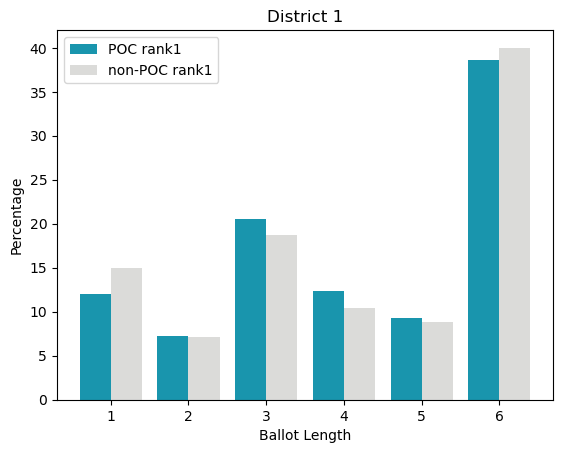

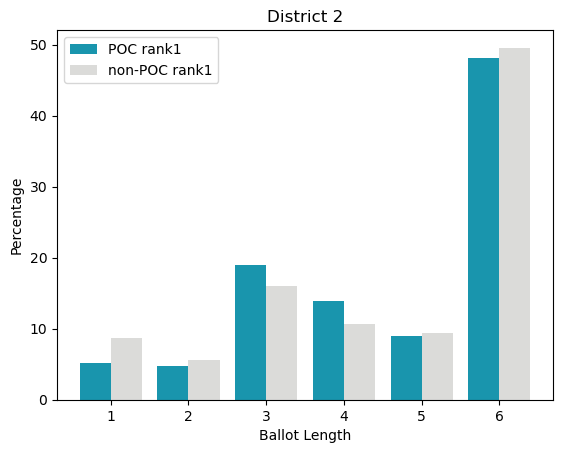

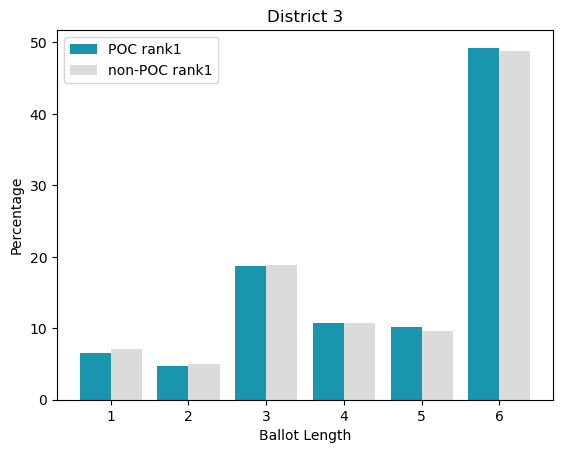

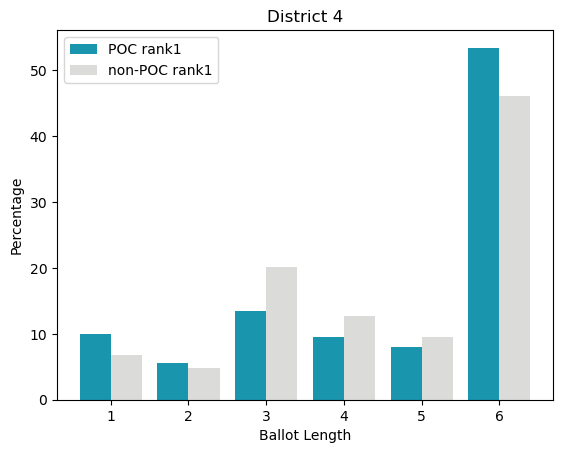

In [48]:
#rank1 only, reconfigured
import pandas as pd

def process_district_data(district, race_info):
    # Load the data for the given district
    data = pd.read_csv(f'Portland_{district}_2024.csv')
    
    # Initialize dictionaries for rank counts
    rank1_minority_lengths = {i: 0 for i in range(1, 7)}
    rank1_white_lengths = {i: 0 for i in range(1, 7)}
    
    # Process the ballots
    for k in range(len(data)):
        ballot = [data.at[k, f'rank{i}'] for i in range(1, 7) if data.at[k, f'rank{i}'] != 'skipped']
        if ballot[0] in race_info.keys():
            if 'White' not in race_info[ballot[0]]:
                rank1_minority_lengths[len(ballot)] += 1
            else:
                rank1_white_lengths[len(ballot)] += 1
        else:
            rank1_white_lengths[len(ballot)] += 1
    
    # Calculate sums and percentages
    sum_minority = sum(rank1_minority_lengths.values())
    sum_white = sum(rank1_white_lengths.values())
    percents_minority = {key: round((value / sum_minority) * 100, 2) for key, value in rank1_minority_lengths.items()}
    percents_white = {key: round((value / sum_white) * 100, 2) for key, value in rank1_white_lengths.items()}
    
    # Store the dictionaries dynamically in globals()
    globals()[f'percents_minority_{district}'] = percents_minority
    globals()[f'percents_white_{district}'] = percents_white
    
    # Optionally print results (can be removed if not needed)
    print(f"District {district} - Minority Counts: {rank1_minority_lengths}")
    print(f"District {district} - White Counts: {rank1_white_lengths}")
    print(f"District {district} - Minority Percentages: {percents_minority}")
    print(f"District {district} - White Percentages: {percents_white}")
    print('\n')

# Example usage for multiple districts
for district in ['D1', 'D2', 'D3', 'D4']:
    # Use globals() to fetch the race_info for each district
    process_district_data(district, globals()[f'race_info_{district}'])


import matplotlib.pyplot as plt
import numpy as np

# Function to create and save the plot
def create_district_plot(district, percents_minority, percents_white):
    # Data for the district
    list1 = percents_minority.values()
    list2 = percents_white.values()

    # Number of bars
    n = len(list1)

    # Set the bar width
    bar_width = 0.4

    # Set positions for each bar
    index = np.arange(n)

    # Create the bars
    plt.bar(index, list1, bar_width, label='POC rank1', color='#1995AD')
    plt.bar(index + bar_width, list2, bar_width, label='non-POC rank1', color='#dbdbd9')
    
    # X-axis labels
    x_labels = [1, 2, 3, 4, 5, 6]

    # Add labels, title, and legend
    plt.xlabel('Ballot Length')
    plt.ylabel('Percentage')
    plt.title(f'District {district}')
    plt.xticks(index + bar_width / 2, x_labels)
    plt.legend()

    # Save and show the plot
    plt.savefig(f'D{district}_ballot_length_POC.png', dpi=400)
    plt.show()

# Example usage for multiple districts
for district in [1, 2, 3, 4]:
    percents_minority = globals()[f'percents_minority_D{district}']
    percents_white = globals()[f'percents_white_D{district}']
    create_district_plot(district, percents_minority, percents_white)


In [ ]:
#Ballot Exhaustion
#creating files with exhaustion information

"""
District 1 notes.

If a ballot contains none of Candace Avalos, Loretta Smith, Jamie Dunphy, Terrence Hayes
then the ballot is exhausted and voter has lost weight 1 from exhaustion

If a ballot contains Loretta Smith or Jamie Dunphy or Terrence Hayes, it's not exhuasted and still
has weight 1 at the end (lost weight 0 from exhaustion)

If a ballot contains Candace Avalos and does not contain Loretta Smith or Jamie Dunphy 
or Terrence Hayes, it will be exhausted. If Avalos is ranked above both Ernst and Hayes
then such a ballot has weight 0.1192 when it's dropped. If Avalos is ranked below either Ernst or
Hayes then the ballots will be exuasted and have weight 0.


Alternatively, remove Terrence Hayes from everything said above.


District 2 notes.

If a ballot contains none of Elana Pirtle-Guiney, Dan Ryan, Sameer Kanal, Tiffani Penson
then the ballot is exhausted and voter has lost weight 1 from exhaustion

If a ballot contains Elana Pirtle-Guiney or Dan Ryan or Tiffani Penson, it's not exhuasted and still
has weight 1 at the end (lost weight 0 from exhaustion)

If a ballot contains Sameer Kanal and does not contain Elana Pirtle-Guiney or Dan Ryan or Tiffani Penson,
it will be exhausted. Such a ballot has weight 0.0528 when Avalos is elected if 
Kanal is ranked above Penson, and 
thus we lose 0.0528 from this ballot from exhaustion. Otherwise this ballot loses weight 1.0.

Alternatively, remove Tiffaniy Penson from everything said above

District 3 notes.

If a ballot contains none of Steve Novick, Angelita Morillo, Tiffany Koyama Lane,
Kezia Wanner, the ballot is exhausted and voter has lost weight 1 from exhaustion

If a ballot contains Angelita Morillo, Tiffany Koyama Lane, or Kezia Wanner, 
not exhausted and voter has lost zero from exhaustion.

If a ballot contains Steve Novick and does not contain Angelita Morillo, 
Tiffany Koyama Lane, or Kezia Wanner, it will be exhausted. Such a ballot has weight 
0.0005 when Novick is elected if Novick is ranked above all previously eliminated candidates,
otherwise we lose weight 1.

Alternatively, remove Kezia Wanner from everything said above

District 4 notes.

If a ballot contains none of Olivia Clark, Mitch Green, Eli Arnold, Eric Zimmerman, 
the ballot is exhausted and voter has lost weight 1 from exhaustion.

If a ballot contains Eli Arnold or Eric Zimmerman, the ballot is not exhausted
and voter has lost zero from exhaustion.

If a ballot contains Mitch Green and Olivia Clark is not ranked above Mitch Green
then the ballot will be exhausted and will have weight 0.0482 when it's dropped.

If a ballot contains Mitch Green and Olivia Clark is ranked above Mitch Green then
the ballot will be exhausted and will have weight 0.0000 when it's dropped.

If a ballot contains Olivia Clark but not Mitch Green, the ballot will be exhausted
and will have weight 0.0001 when it's dropped.

Alternatively, remove Eli Arnold from above.
"""

import pandas as pd

# District 1 exhaustion
data = pd.read_csv('/Users/cdonnay/Documents/GitHub/MGGG/Portland-Postmortem/old_CVRs/Portland_D1_Condensed.csv')

# Create empty DataFrames with specified columns
columns = ['Precinct','rank1', 'rank2', 'rank3', 'rank4', 'rank5', 'rank6', 'exhausted', 'elective exhaustion', 'weight lost']
D1_frame_V1 = pd.DataFrame(columns=columns)
D1_frame_V2 = pd.DataFrame(columns=columns)

# Process each row in the data
for k in range(len(data)):
    # Initialize variables
    exhausted = False
    elective_exhaustion = 'N/A'
    weight_lost = 0.0
    
    # Get the valid ballot
    ballot = [data.at[k, f'rank{i}'] for i in range(1, 7) if data.at[k, f'rank{i}'] != 'skipped']
    
    # First condition set for D1_frame_V1
    if 'Candace Avalos' not in ballot and 'Loretta Smith' not in ballot and 'Jamie Dunphy' not in ballot and 'Terrence Hayes' not in ballot:
        exhausted = True
        elective_exhaustion = False if len(ballot) == 6 else True
        weight_lost = 1.0
    elif 'Loretta Smith' in ballot or 'Jamie Dunphy' in ballot or 'Terrence Hayes' in ballot:
        exhausted = False
        elective_exhaustion = 'N/A'
        weight_lost = 0.0
    else:
        
        exhausted = True
        elective_exhaustion = False if len(ballot) == 6 else True
        candace_index = ballot.index('Candace Avalos')
        noah_index = ballot.index('Noah Ernst') if 'Noah Ernst' in ballot else float('inf')
        terrence_index = ballot.index('Terrence Hayes') if 'Terrence Hayes' in ballot else float('inf')
    
        # Check if Candace Avalos appears before both Jamie and Terrence
        if candace_index < terrence_index and candace_index < noah_index:
            weight_lost=0.1192
        else:
            weight_lost = 1.0

    # Append to D1_frame_V1
    D1_frame_V1.loc[len(D1_frame_V1)] = [ data.at[k,'Precinct'],
        data.at[k, 'rank1'], data.at[k, 'rank2'], data.at[k, 'rank3'], data.at[k, 'rank4'],
        data.at[k, 'rank5'], data.at[k, 'rank6'], exhausted, elective_exhaustion, weight_lost
    ]
    
    # Reset variables for D1_frame_V2
    exhausted = False
    elective_exhaustion = 'N/A'
    weight_lost = 0.0

    # Second condition set for D1_frame_V2
    if 'Candace Avalos' not in ballot and 'Loretta Smith' not in ballot and 'Jamie Dunphy' not in ballot:
        exhausted = True
        elective_exhaustion = False if len(ballot) == 6 else True
        weight_lost = 1.0
    elif 'Loretta Smith' in ballot or 'Jamie Dunphy' in ballot:
        exhausted = False
        elective_exhaustion = 'N/A'
        weight_lost = 0.0
    else:
        exhausted = True
        elective_exhaustion = False if len(ballot) == 6 else True
        candace_index = ballot.index('Candace Avalos')
        noah_index = ballot.index('Noah Ernst') if 'Noah Ernst' in ballot else float('inf')
        terrence_index = ballot.index('Terrence Hayes') if 'Terrence Hayes' in ballot else float('inf')
    
        # Check if Candace Avalos appears before both Jamie and Terrence
        if candace_index < terrence_index and candace_index < noah_index:
            weight_lost=0.1192
        else:
            weight_lost = 1.0

    # Append to D1_frame_V2
    D1_frame_V2.loc[len(D1_frame_V2)] = [data.at[k,'Precinct'],
        data.at[k, 'rank1'], data.at[k, 'rank2'], data.at[k, 'rank3'], data.at[k, 'rank4'],
        data.at[k, 'rank5'], data.at[k, 'rank6'], exhausted, elective_exhaustion, weight_lost
    ]

# Save the resulting DataFrames to CSV
D1_frame_V1.to_csv('D1_Condensed_exhaustion_V1.csv', index=False)
D1_frame_V2.to_csv('D1_Condensed_exhaustion_V2.csv', index=False)


# District 2 exhaustion
data = pd.read_csv('Portland_D2_Condensed.csv')

# Create empty DataFrames with specified columns
columns = ['Precinct','rank1', 'rank2', 'rank3', 'rank4', 'rank5', 'rank6', 'exhausted', 'elective exhaustion', 'weight lost']
D2_frame_V1 = pd.DataFrame(columns=columns)
D2_frame_V2 = pd.DataFrame(columns=columns)

# Process each row in the data
for k in range(len(data)):
    # Initialize variables
    exhausted = False
    elective_exhaustion = 'N/A'
    weight_lost = 0.0
    
    # Get the valid ballot
    ballot = [data.at[k, f'rank{i}'] for i in range(1, 7) if data.at[k, f'rank{i}'] != 'skipped']
    
    # First condition set for D1_frame_V1
    if 'Elana Pirtle-Guiney' not in ballot and 'Dan Ryan' not in ballot and 'Sameer Kanal' not in ballot and 'Tiffani Penson' not in ballot:
        exhausted = True
        elective_exhaustion = False if len(ballot) == 6 else True
        weight_lost = 1.0
    elif 'Elana Pirtle-Guiney' in ballot or 'Dan Ryan' in ballot or 'Tiffani Penson' in ballot:
        exhausted = False
        elective_exhaustion = 'N/A'
        weight_lost = 0.0
    else:
        exhausted = True
        elective_exhaustion = False if len(ballot) == 6 else True
        weight_lost = 0.0528

    # Append to D1_frame_V1
    D2_frame_V1.loc[len(D2_frame_V1)] = [data.at[k,'Precinct'],
        data.at[k, 'rank1'], data.at[k, 'rank2'], data.at[k, 'rank3'], data.at[k, 'rank4'],
        data.at[k, 'rank5'], data.at[k, 'rank6'], exhausted, elective_exhaustion, weight_lost
    ]
    
    # Reset variables for D1_frame_V2
    exhausted = False
    elective_exhaustion = 'N/A'
    weight_lost = 0.0

    # Second condition set for D1_frame_V2
    if 'Elana Pirtle-Guiney' not in ballot and 'Dan Ryan' not in ballot and 'Sameer Kanal' not in ballot:
        exhausted = True
        elective_exhaustion = False if len(ballot) == 6 else True
        weight_lost = 1.0
    elif 'Elana Pirtle-Guiney' in ballot or 'Dan Ryan' in ballot:
        exhausted = False
        elective_exhaustion = 'N/A'
        weight_lost = 0.0
    else:
        exhausted = True
        elective_exhaustion = False if len(ballot) == 6 else True
        sameer_index = ballot.index('Sameer Kanal')
        tiffani_index = ballot.index('Tiffani Penson') if 'Tiffani Penson' in ballot else float('inf')
        
        # Check if Sameer Kanal is ranked higher than Tiffani Penson
        if sameer_index < tiffani_index:
            weight_lost=0.0528
        else:
            weight_lost = 1.0

    # Append to D1_frame_V2
    D2_frame_V2.loc[len(D2_frame_V2)] = [data.at[k,'Precinct'],
        data.at[k, 'rank1'], data.at[k, 'rank2'], data.at[k, 'rank3'], data.at[k, 'rank4'],
        data.at[k, 'rank5'], data.at[k, 'rank6'], exhausted, elective_exhaustion, weight_lost
    ]

# Save the resulting DataFrames to CSV
D2_frame_V1.to_csv('D2_Condensed_exhaustion_V1.csv', index=False)
D2_frame_V2.to_csv('D2_Condensed_exhaustion_V2.csv', index=False)


# District 3 exhaustion
#NOTE: In D3, the three winners make quota before Wanner is eliminated.
#Thus, it is unambiguous that Version 1 is what you want.

data = pd.read_csv('Portland_D3_Condensed.csv')

# Create empty DataFrames with specified columns
columns = ['Precinct','rank1', 'rank2', 'rank3', 'rank4', 'rank5', 'rank6', 'exhausted', 'elective exhaustion', 'weight lost']
D3_frame_V1 = pd.DataFrame(columns=columns)
D3_frame_V2 = pd.DataFrame(columns=columns)

# Process each row in the data
for k in range(len(data)):
    # Initialize variables
    exhausted = False
    elective_exhaustion = 'N/A'
    weight_lost = 0.0
    
    # Get the valid ballot
    ballot = [data.at[k, f'rank{i}'] for i in range(1, 7) if data.at[k, f'rank{i}'] != 'skipped']
    
    # First condition set for D3_frame_V1
    if 'Steve Novick' not in ballot and 'Angelita Morillo' not in ballot and 'Tiffany Koyama Lane' not in ballot and 'Kezia Wanner' not in ballot:
        exhausted = True
        elective_exhaustion = False if len(ballot) == 6 else True
        weight_lost = 1.0
    elif 'Angelita Morillo' in ballot or 'Tiffany Koyama Lane' in ballot or 'Kezia Wanner' in ballot:
        exhausted = False
        elective_exhaustion = 'N/A'
        weight_lost = 0.0
    else:
        
        exhausted = True
        elective_exhaustion = False if len(ballot) == 6 else True
        candidates_to_check = [
        'Jonathan (Jon) Walker', 'Cristal Azul Otero', 'Sandeep Bali',
        'Philippe Kanb', 'Daniel DeMelo', 'Harrison Kass',
        'Jesse Cornett', 'Rex Burkholder'
            ]
        
       
        steve_index = ballot.index('Steve Novick')  # Index of Steve Novick
        
        # Find the smallest index of the other candidates in the ballot
        earliest_opponent_index = float('inf')
        for candidate in candidates_to_check:
            if candidate in ballot:
                earliest_opponent_index = min(earliest_opponent_index, ballot.index(candidate))
        
        # Determine if Steve Novick appears before any of the listed candidates
        if steve_index < earliest_opponent_index:
            weight_lost=0.0005
        else:
            weight_lost=1.0

    

    # Append to D3_frame_V1
    D3_frame_V1.loc[len(D3_frame_V1)] = [data.at[k,'Precinct'],
        data.at[k, 'rank1'], data.at[k, 'rank2'], data.at[k, 'rank3'], data.at[k, 'rank4'],
        data.at[k, 'rank5'], data.at[k, 'rank6'], exhausted, elective_exhaustion, weight_lost
    ]
    
    # Reset variables for D3_frame_V2
    exhausted = False
    elective_exhaustion = 'N/A'
    weight_lost = 0.0

    # Second condition set for D3_frame_V2
    if 'Steve Novick' not in ballot and 'Angelita Morillo' not in ballot and 'Tiffany Koyama Lane' not in ballot:
        exhausted = True
        elective_exhaustion = False if len(ballot) == 6 else True
        weight_lost = 1.0
    elif 'Angelita Morillo' in ballot or 'Tiffany Koyama Lane' in ballot:
        exhausted = False
        elective_exhaustion = 'N/A'
        weight_lost = 0.0
    else:
        
        exhausted = True
        elective_exhaustion = False if len(ballot) == 6 else True
        candidates_to_check = [
        'Jonathan (Jon) Walker', 'Cristal Azul Otero', 'Sandeep Bali',
        'Philippe Kanb', 'Daniel DeMelo', 'Harrison Kass',
        'Jesse Cornett', 'Rex Burkholder','Kezia Wanner'
            ]
        
       
        steve_index = ballot.index('Steve Novick')  # Index of Steve Novick
        
        # Find the smallest index of the other candidates in the ballot
        earliest_opponent_index = float('inf')
        for candidate in candidates_to_check:
            if candidate in ballot:
                earliest_opponent_index = min(earliest_opponent_index, ballot.index(candidate))
        
        # Determine if Steve Novick appears before any of the listed candidates
        if steve_index < earliest_opponent_index:
            weight_lost=0.0005
        else:
            weight_lost=1.0


    # Append to D3_frame_V2
    D3_frame_V2.loc[len(D3_frame_V2)] = [data.at[k,'Precinct'],
        data.at[k, 'rank1'], data.at[k, 'rank2'], data.at[k, 'rank3'], data.at[k, 'rank4'],
        data.at[k, 'rank5'], data.at[k, 'rank6'], exhausted, elective_exhaustion, weight_lost
    ]

# Save the resulting DataFrames to CSV
D3_frame_V1.to_csv('D3_Condensed_exhaustion_V1.csv', index=False)
D3_frame_V2.to_csv('D3_exhaustion_V2.csv', index=False)

# District 4 exhaustion

data = pd.read_csv('Portland_D4_Condensed.csv')

# Create empty DataFrames with specified columns
columns = ['Precinct','rank1', 'rank2', 'rank3', 'rank4', 'rank5', 'rank6', 'exhausted', 'elective exhaustion', 'weight lost']
D4_frame_V1 = pd.DataFrame(columns=columns)
D4_frame_V2 = pd.DataFrame(columns=columns)

# Process each row in the data
for k in range(len(data)):
    # Initialize variables
    exhausted = False
    elective_exhaustion = 'N/A'
    weight_lost = 0.0
    
    # Get the valid ballot
    ballot = [data.at[k, f'rank{i}'] for i in range(1, 7) if data.at[k, f'rank{i}'] != 'skipped']
    
    # First condition set for D4_frame_V1
    if 'Olivia Clark' not in ballot and 'Mitch Green' not in ballot and 'Eric Zimmerman' not in ballot and 'Eli Arnold' not in ballot:
        exhausted = True
        elective_exhaustion = False if len(ballot) == 6 else True
        weight_lost = 1.0
    elif 'Eric Zimmerman' in ballot or 'Eli Arnold' in ballot:
        exhausted = False
        elective_exhaustion = 'N/A'
        weight_lost = 0.0
    elif 'Olivia Clark' in ballot and 'Mitch Green' not in ballot:
        exhausted=True
        elective_exhaustion = False if len(ballot) == 6 else True
        candidates_to_check = [
        'Chad Lykins','Sarah Silkie','Bob Weinstein','Lisa Freeman','Tony Morse','Ben Hufford',
        'Kevin Goldsmith','Andra Vltavin','Stanley Penkin','John Toran','Chloe Mason',
        'Bob Callahan','Moses Ross','Ciatta R Thompson','Raquel Coyote','Mike DiNapoli',
        'John J Goldsmith','Chris Henry','Joseph (Joe) Alfone','Uncertified Write In',
        'Michael Trimble',      
            ]
        
        olivia_index = ballot.index('Olivia Clark')  # Index of Olivia Clark
        
        # Find the smallest index of the other candidates in the ballot
        earliest_opponent_index = float('inf')
        for candidate in candidates_to_check:
            if candidate in ballot:
                earliest_opponent_index = min(earliest_opponent_index, ballot.index(candidate))
        
        # Determine if Olivia Clark appears before any of the listed candidates
        if olivia_index < earliest_opponent_index:
            weight_lost=0.0001
        else:
            weight_lost=1.0
    elif 'Olivia Clark' not in ballot and 'Mitch Green' in ballot:
        exhausted=True
        elective_exhaustion = False if len(ballot) == 6 else True
        weight_lost=0.0482
            

    elif 'Olivia Clark' in ballot and 'Mitch Green' in ballot:
        exhausted=True
        elective_exhaustion = False if len(ballot) == 6 else True
        weight_lost = 0.0
        olivia_index = ballot.index('Olivia Clark')
        mitch_index = ballot.index('Mitch Green')
        if mitch_index<olivia_index:
            weight_lost=0.0482
        if olivia_index<mitch_index:
            candidates_to_check = [
            'Chad Lykins','Sarah Silkie','Bob Weinstein','Lisa Freeman','Tony Morse','Ben Hufford',
            'Kevin Goldsmith','Andra Vltavin','Stanley Penkin','John Toran','Chloe Mason',
            'Bob Callahan','Moses Ross','Ciatta R Thompson','Raquel Coyote','Mike DiNapoli',
            'John J Goldsmith','Chris Henry','Joseph (Joe) Alfone','Uncertified Write In',
            'Michael Trimble',      
                ]
            
            # Find the smallest index of the other candidates in the ballot
            earliest_opponent_index = float('inf')
            for candidate in candidates_to_check:
                if candidate in ballot:
                    earliest_opponent_index = min(earliest_opponent_index, ballot.index(candidate))
            if earliest_opponent_index<olivia_index:
                weight_lost=0.0482
            else:
                weight_lost=0.0
            
    

    # Append to D4_frame_V1
    D4_frame_V1.loc[len(D4_frame_V1)] = [data.at[k,'Precinct'],
        data.at[k, 'rank1'], data.at[k, 'rank2'], data.at[k, 'rank3'], data.at[k, 'rank4'],
        data.at[k, 'rank5'], data.at[k, 'rank6'], exhausted, elective_exhaustion, weight_lost
    ]
"""
    # Reset variables for D4_frame_V2
    exhausted = False
    elective_exhaustion = 'N/A'
    weight_lost = 0.0

    # Second condition set for D4_frame_V2
    # First condition set for D4_frame_V1
    if 'Olivia Clark' not in ballot and 'Mitch Green' not in ballot and 'Eric Zimmerman' not in ballot:
        exhausted = True
        elective_exhaustion = False if len(ballot) == 6 else True
        weight_lost = 1.0
    elif 'Eric Zimmerman' in ballot:
        exhausted = False
        elective_exhaustion = 'N/A'
        weight_lost = 0.0
    elif 'Olivia Clark' in ballot and 'Mitch Green' not in ballot:
        exhausted=True
        elective_exhaustion = False if len(ballot) == 6 else True
        candidates_to_check = [
        'Chad Lykins','Sarah Silkie','Bob Weinstein','Lisa Freeman','Tony Morse','Ben Hufford',
        'Kevin Goldsmith','Andra Vltavin','Stanley Penkin','John Toran','Chloe Mason',
        'Bob Callahan','Moses Ross','Ciatta R Thompson','Raquel Coyote','Mike DiNapoli',
        'John J Goldsmith','Chris Henry','Joseph (Joe) Alfone','Uncertified Write In',
        'Michael Trimble','Eli Arnold'       
            ]
        
        olivia_index = ballot.index('Olivia Clark')  # Index of Olivia Clark
        
        # Find the smallest index of the other candidates in the ballot
        earliest_opponent_index = float('inf')
        for candidate in candidates_to_check:
            if candidate in ballot:
                earliest_opponent_index = min(earliest_opponent_index, ballot.index(candidate))
        
        # Determine if Olivia Clark appears before any of the listed candidates
        if olivia_index < earliest_opponent_index:
            weight_lost=0.0001
        else:
            weight_lost=1.0
    elif 'Olivia Clark' not in ballot and 'Mitch Green' in ballot:
        exhausted = True
        elective_exhaustion = False if len(ballot) == 6 else True
        weight_lost = 0.0482

    elif 'Olivia Clark' in ballot and 'Mitch Green' in ballot:
        exhausted = True
        elective_exhaustion = False if len(ballot) == 6 else True
        weight_lost = 0.0
        olivia_index = ballot.index('Olivia Clark')  # Index of Olivia Clark
        mitch_index = ballot.index('Mitch Green')
        Eli_index = ballot.index('Eli Arnold') if 'Eli Arnold' in ballot else float('inf')
        if mitch_index<olivia_index:
            

    # Append to D4_frame_V2
    D4_frame_V2.loc[len(D4_frame_V2)] = [
        data.at[k, 'rank1'], data.at[k, 'rank2'], data.at[k, 'rank3'], data.at[k, 'rank4'],
        data.at[k, 'rank5'], data.at[k, 'rank6'], exhausted, elective_exhaustion, weight_lost
    ]
"""
# Save the resulting DataFrames to CSV
D4_frame_V1.to_csv('D4_Condensed_exhaustion_V1.csv', index=False)
#D4_frame_V2.to_csv('D4_exhaustion_V2.csv', index=False)


In [52]:
#ballot exhaustion getting results

print('D1 results')
data = pd.read_csv('D1_exhaustion_V1.csv')
exhausted=0
non_exhausted=0
exhausted_forced=0
exhausted_elected=0
exhausted_contributed_to_win=0
for k in range(len(data)):
    if data.at[k,'exhausted']:
        exhausted+=1
        if data.at[k,'elective exhaustion']:
            exhausted_elected+=1
        else:
            exhausted_forced+=1
        if data.at[k,'weight lost']==0.1192:
            exhausted_contributed_to_win+=1
    else:
        non_exhausted+=1
print('not exhausted',non_exhausted)
print('exhausted',exhausted)
print('exhaustion rate',round(exhausted/(exhausted+non_exhausted)*100,2))
print('% elective',round(exhausted_elected/exhausted*100,2))
print('% forced',round(exhausted_forced/exhausted*100,2)) 
print('% exhausted ballots contribute to a win', round(exhausted_contributed_to_win/exhausted*100,2))

data = pd.read_csv('D1_exhaustion_V2.csv')
exhausted=0
non_exhausted=0
exhausted_forced=0
exhausted_elected=0
exhausted_contributed_to_win=0
for k in range(len(data)):
    if data.at[k,'exhausted']:
        exhausted+=1
        if data.at[k,'elective exhaustion']:
            exhausted_elected+=1
        else:
            exhausted_forced+=1
        if data.at[k,'weight lost']==0.1192:
            exhausted_contributed_to_win+=1
    else:
        non_exhausted+=1
print('not exhausted',non_exhausted)
print('exhausted',exhausted)
print('exhaustion rate',round(exhausted/(exhausted+non_exhausted)*100,2))
print('% elective',round(exhausted_elected/exhausted*100,2))
print('% forced',round(exhausted_forced/exhausted*100,2))
print('% exhausted ballots contribute to a win', round(exhausted_contributed_to_win/exhausted*100,2))
print('\n')

print('D2 results')
data = pd.read_csv('D2_exhaustion_V1.csv')
exhausted=0
non_exhausted=0
exhausted_forced=0
exhausted_elected=0
exhausted_contributed_to_win=0
for k in range(len(data)):
    if data.at[k,'exhausted']:
        exhausted+=1
        if data.at[k,'elective exhaustion']:
            exhausted_elected+=1
        else:
            exhausted_forced+=1
        if data.at[k,'weight lost']==0.0528:
            exhausted_contributed_to_win+=1
    else:
        non_exhausted+=1
print('not exhausted',non_exhausted)
print('exhausted',exhausted)
print('exhaustion rate',round(exhausted/(exhausted+non_exhausted)*100,2))
print('% elective',round(exhausted_elected/exhausted*100,2))
print('% forced',round(exhausted_forced/exhausted*100,2))
print('% exhausted ballots contribute to a win', round(exhausted_contributed_to_win/exhausted*100,2))

data = pd.read_csv('D2_exhaustion_V2.csv')
exhausted=0
non_exhausted=0
exhausted_forced=0
exhausted_elected=0
exhausted_contributed_to_win=0
for k in range(len(data)):
    if data.at[k,'exhausted']:
        exhausted+=1
        if data.at[k,'elective exhaustion']:
            exhausted_elected+=1
        else:
            exhausted_forced+=1
        if data.at[k,'weight lost']==0.0528:
            exhausted_contributed_to_win+=1
    else:
        non_exhausted+=1
print('not exhausted',non_exhausted)
print('exhausted',exhausted)
print('exhaustion rate',round(exhausted/(exhausted+non_exhausted)*100,2))
print('% elective',round(exhausted_elected/exhausted*100,2))
print('% forced',round(exhausted_forced/exhausted*100,2))
print('% exhausted ballots contribute to a win', round(exhausted_contributed_to_win/exhausted*100,2))
print('\n')


print('D3 results')
data = pd.read_csv('D3_exhaustion_V1.csv')
exhausted=0
non_exhausted=0
exhausted_forced=0
exhausted_elected=0
exhausted_contributed_to_win=0
for k in range(len(data)):
    if data.at[k,'exhausted']:
        exhausted+=1
        if data.at[k,'elective exhaustion']:
            exhausted_elected+=1
        else:
            exhausted_forced+=1
        if data.at[k,'weight lost']==0.0005:
            exhausted_contributed_to_win+=1
    else:
        non_exhausted+=1
print('not exhausted',non_exhausted)
print('exhausted',exhausted)
print('exhaustion rate',round(exhausted/(exhausted+non_exhausted)*100,2))
print('% elective',round(exhausted_elected/exhausted*100,2))
print('% forced',round(exhausted_forced/exhausted*100,2))
print('% exhausted ballots contribute to a win', round(exhausted_contributed_to_win/exhausted*100,2))
print('\n')

data = pd.read_csv('D3_exhaustion_V2.csv')
exhausted=0
non_exhausted=0
exhausted_forced=0
exhausted_elected=0
for k in range(len(data)):
    if data.at[k,'exhausted']:
        exhausted+=1
        if data.at[k,'elective exhaustion']:
            exhausted_elected+=1
        else:
            exhausted_forced+=1
    else:
        non_exhausted+=1
print('not exhausted',non_exhausted)
print('exhausted',exhausted)
print('exhaustion rate',round(exhausted/(exhausted+non_exhausted)*100,2))
print('% elective',round(exhausted_elected/exhausted*100,2))
print('% forced',round(exhausted_forced/exhausted*100,2))   
print('\n')

print('D4 results')
data = pd.read_csv('D4_exhaustion_V1.csv')
exhausted=0
non_exhausted=0
exhausted_forced=0
exhausted_elected=0
exhausted_contributed_to_win=0
for k in range(len(data)):
    if data.at[k,'exhausted']:
        exhausted+=1
        if data.at[k,'elective exhaustion']:
            exhausted_elected+=1
        else:
            exhausted_forced+=1
        if data.at[k,'weight lost']==0.0482 or data.at[k,'weight lost']==0.0001 or (data.at[k,'weight lost']==0.0 and data.at[k,'exhausted']):
            exhausted_contributed_to_win+=1 
    else:
        non_exhausted+=1
print('not exhausted',non_exhausted)
print('exhausted',exhausted)
print('exhaustion rate',round(exhausted/(exhausted+non_exhausted)*100,2))
print('% elective',round(exhausted_elected/exhausted*100,2))
print('% forced',round(exhausted_forced/exhausted*100,2)) 
print('% exhausted ballots contribute to a win', round(exhausted_contributed_to_win/exhausted*100,2))
print('\n')


D1 results
not exhausted 32993
exhausted 9878
exhaustion rate 23.04
% elective 86.1
% forced 13.9
% exhausted ballots contribute to a win 35.31
not exhausted 28787
exhausted 14084
exhaustion rate 32.85
% elective 81.08
% forced 18.92
% exhausted ballots contribute to a win 29.89


D2 results
not exhausted 60133
exhausted 17024
exhaustion rate 22.06
% elective 69.68
% forced 30.32
% exhausted ballots contribute to a win 55.2
not exhausted 50436
exhausted 26721
exhaustion rate 34.63
% elective 66.04
% forced 33.96
% exhausted ballots contribute to a win 46.09


D3 results
not exhausted 69057
exhausted 15458
exhaustion rate 18.29
% elective 77.88
% forced 22.12
% exhausted ballots contribute to a win 43.69


not exhausted 58742
exhausted 25773
exhaustion rate 30.5
% elective 70.4
% forced 29.6


D4 results
not exhausted 46041
exhausted 30676
exhaustion rate 39.99
% elective 64.39
% forced 35.61
% exhausted ballots contribute to a win 64.41




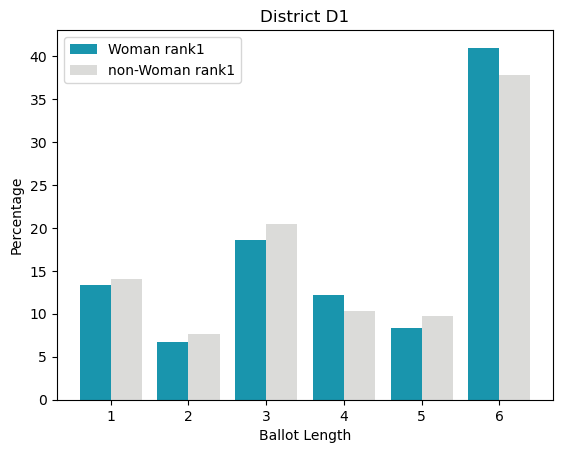

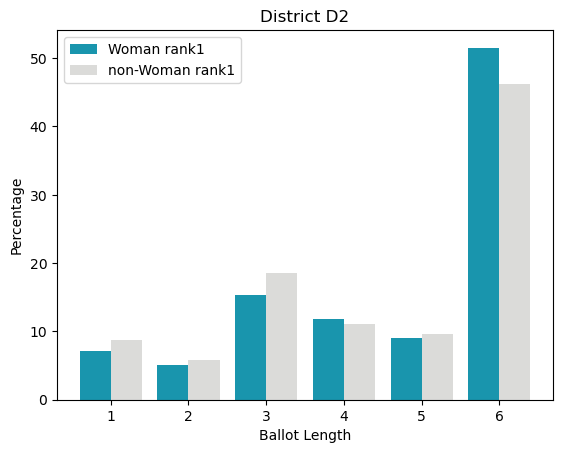

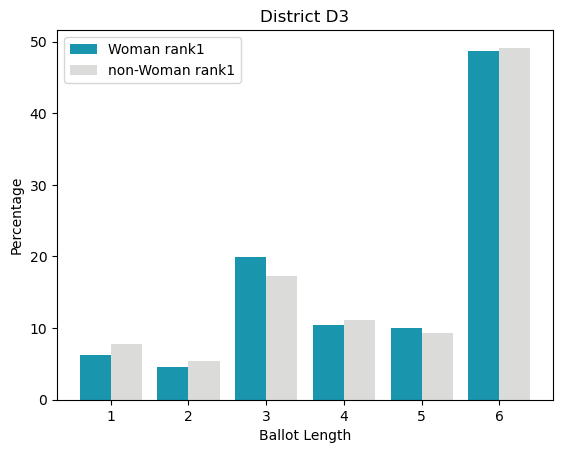

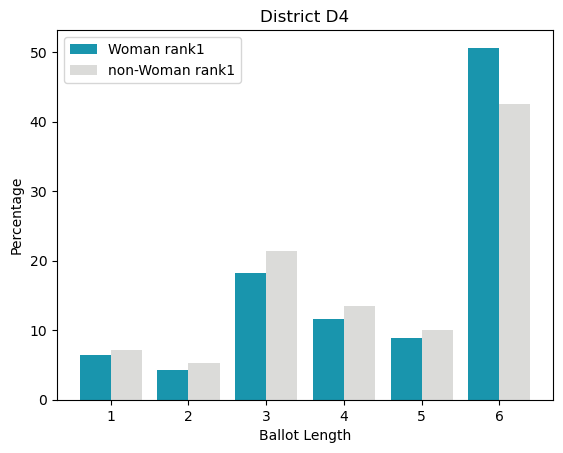

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def process_district_data(district, race_info):
    # Load the data for the given district
    data = pd.read_csv(f'Portland_{district}_2024.csv')
    
    # Initialize dictionaries for rank counts
    rank1_non_F_lengths = {i: 0 for i in range(1, 7)}
    rank1_F_lengths = {i: 0 for i in range(1, 7)}
    
    # Process the ballots
    for k in range(len(data)):
        ballot = [data.at[k, f'rank{i}'] for i in range(1, 7) if data.at[k, f'rank{i}'] != 'skipped']
        if len(ballot) > 0:
            if ballot[0] in race_info.keys():
                if 'Woman' not in race_info[ballot[0]]:
                    rank1_non_F_lengths[len(ballot)] += 1
                else:
                    rank1_F_lengths[len(ballot)] += 1
            else:
                rank1_F_lengths[len(ballot)] += 1
    
    # Calculate sums and percentages
    sum_non_F = sum(rank1_non_F_lengths.values())
    sum_F = sum(rank1_F_lengths.values())
    percents_non_F = {key: round((value / sum_non_F) * 100, 2) for key, value in rank1_non_F_lengths.items()}
    percents_F = {key: round((value / sum_F) * 100, 2) for key, value in rank1_F_lengths.items()}
    
    # Store the dictionaries dynamically in globals()
    globals()[f'percents_non_F_{district}'] = percents_non_F
    globals()[f'percents_F_{district}'] = percents_F


def create_district_plot(district, percents_F, percents_non_F):
    # Data for the district
    list1 = percents_F.values()
    list2 = percents_non_F.values()

    # Number of bars
    n = len(list1)

    # Set the bar width
    bar_width = 0.4

    # Set positions for each bar
    index = np.arange(n)

    # Create the bars
    plt.bar(index, list1, bar_width, label='Woman rank1', color='#1995AD')
    plt.bar(index + bar_width, list2, bar_width, label='non-Woman rank1', color='#dbdbd9')
    
    # X-axis labels
    x_labels = [1, 2, 3, 4, 5, 6]

    # Add labels, title, and legend
    plt.xlabel('Ballot Length')
    plt.ylabel('Percentage')
    plt.title(f'District {district}')
    plt.xticks(index + bar_width / 2, x_labels)
    plt.legend()

    # Save and show the plot
    plt.savefig(f'D{district}_ballot_length_Woman.png', dpi=400)
    plt.show()


# Example usage for multiple districts
for district in ['D1', 'D2', 'D3', 'D4']:
    process_district_data(district, globals()[f'race_info_{district}'])

for district in ['D1', 'D2', 'D3', 'D4']:
    percents_F = globals()[f'percents_F_{district}']
    percents_non_F = globals()[f'percents_non_F_{district}']
    create_district_plot(district, percents_F, percents_non_F)


In [ ]:
#Contribution to winner information

import pandas as pd

# District 1 exhaustion
data = pd.read_csv('Portland_D1_Condensed.csv')

# Create empty DataFrames with specified columns
columns = ['Precint','rank1', 'rank2', 'rank3', 'rank4', 'rank5', 'rank6', 'weight to Candace Avalos', 'weight to Loretta Smith', 'weight to Jamie Dunphy']
D1_frame_V1 = pd.DataFrame(columns=columns)


# Process each row in the data
for k in range(len(data)):
    # Initialize variables
    weight_to_A=0.0
    weight_to_S=0.0
    weight_to_D=0.0
    
    # Get the valid ballot
    ballot = [data.at[k, f'rank{i}'] for i in range(1, 7) if data.at[k, f'rank{i}'] != 'skipped']
    # First condition set for D1_frame_V1
    smith = 'Loretta Smith'
    dunphy = 'Jamie Dunphy'
    cand_avalos = 'Candace Avalos'
    if 'Candace Avalos' in ballot:

        # Define candidates
        other_candidates = ['Loretta Smith', 'Jamie Dunphy', 'Noah Ernst', 'Terrence Hayes']
        
        # Get the indices of each candidate in the ballot
        avalos_index = ballot.index(cand_avalos)
        indices = [ballot.index(cand) if cand in ballot else float('inf') for cand in other_candidates]

        smith_index = ballot.index(smith) if smith in ballot else float('inf')
        dunphy_index = ballot.index(dunphy) if dunphy in ballot else float('inf')
        #print(ballot, avalos_index, min(indices))
        # Set weight_to_A if Avalos is ranked above any of the other candidates
        if avalos_index<min(indices):
            #print('in here')
            weight_to_A = 0.8808
        
            # Set weights for Smith and Dunphy based on their relative positions
            if smith_index != float('inf') or dunphy_index != float('inf'):
                if smith_index < dunphy_index:
                    weight_to_S = 0.1192
                elif dunphy_index < smith_index:
                    weight_to_D = 0.1192
        else:
            #print('in here')
            if smith_index != float('inf') or dunphy_index != float('inf'):
                if smith_index < dunphy_index:
                    weight_to_S = 1.0
                elif dunphy_index < smith_index:
                    weight_to_D = 1.0
    elif 'Loretta Smith' in ballot or 'Jamie Dunphy' in ballot:
        smith_index = ballot.index(smith) if smith in ballot else float('inf')
        dunphy_index = ballot.index(dunphy) if dunphy in ballot else float('inf')
        if smith_index < dunphy_index:
                weight_to_S = 1.0
        elif dunphy_index < smith_index:
            weight_to_D = 1.0
    #print(ballot,weight_to_A, weight_to_S, weight_to_D)

    # Append to D1_frame_V1
    D1_frame_V1.loc[len(D1_frame_V1)] = [ data.at[k,'Precinct'],
        data.at[k, 'rank1'], data.at[k, 'rank2'], data.at[k, 'rank3'], data.at[k, 'rank4'],
        data.at[k, 'rank5'], data.at[k, 'rank6'], weight_to_A, weight_to_S, weight_to_D
    ]
    
  

# Save the resulting DataFrames to CSV
D1_frame_V1.to_csv('D1_weight_to_winners.csv', index=False)



# District 2 weight to winner
data = pd.read_csv('Portland_D2_Condensed.csv')

# Create empty DataFrames with specified columns
columns = ['Precinct','rank1', 'rank2', 'rank3', 'rank4', 'rank5', 'rank6', 'weight to Sameer Kanal','weight to Dan Ryan','weight to Elana Pirtle-Guiney']
D2_frame_V1 = pd.DataFrame(columns=columns)
D2_frame_V2 = pd.DataFrame(columns=columns)

# Process each row in the data
for k in range(len(data)):
    # Initialize variables
    weight_to_K=0.0
    weight_to_R=0.0
    weight_to_P=0.0
    kanal = 'Sameer Kanal'
    p_g = 'Elana Pirtle-Guiney'
    ryan = 'Dan Ryan'
    # Get the valid ballot
    ballot = [data.at[k, f'rank{i}'] for i in range(1, 7) if data.at[k, f'rank{i}'] != 'skipped']
    # First condition set for D1_frame_V1
    
    if 'Sameer Kanal' in ballot:

        # Define candidates
       
        other_candidates = ['Elana Pirtle-Guiney','Dan Ryan','Tiffani Penson']
        
        
        # Get the indices of each candidate in the ballot
        kanal_index = ballot.index(kanal)
        indices = [ballot.index(cand) if cand in ballot else float('inf') for cand in other_candidates]

        p_g_index = ballot.index(p_g) if p_g in ballot else float('inf')
        ryan_index = ballot.index(ryan) if ryan in ballot else float('inf')
        #print(ballot, avalos_index, min(indices))
        # Set weight_to_A if Avalos is ranked above any of the other candidates
        if kanal_index<min(indices):
            #print('in here')
            weight_to_K = 0.9472
        
            # Set weights for Smith and Dunphy based on their relative positions
            if p_g_index != float('inf') or ryan_index != float('inf'):
                if p_g_index < ryan_index:
                    weight_to_P = 0.0528
                elif ryan_index < p_g_index:
                    weight_to_R = 0.0528
        else:
            #print('in here')
            if p_g_index != float('inf') or ryan_index != float('inf'):
                if p_g_index < ryan_index:
                    weight_to_P = 1.0
                elif ryan_index < p_g_index:
                    weight_to_R = 1.0
    elif 'Elana Pirtle-Guiney' in ballot or 'Dan Ryan' in ballot:
        p_g_index = ballot.index(p_g) if p_g in ballot else float('inf')
        ryan_index = ballot.index(ryan) if ryan in ballot else float('inf')
        if p_g_index < ryan_index:
            weight_to_P = 1.0
        elif ryan_index < p_g_index:
            weight_to_R = 1.0
    #print(ballot,weight_to_K, weight_to_R, weight_to_P)
    
    
    # Append to D1_frame_V1
    D2_frame_V1.loc[len(D2_frame_V1)] = [data.at[k, 'Precinct'],
        data.at[k, 'rank1'], data.at[k, 'rank2'], data.at[k, 'rank3'], data.at[k, 'rank4'],
        data.at[k, 'rank5'], data.at[k, 'rank6'], weight_to_K, weight_to_R, weight_to_P
    ]
    
    
# Save the resulting DataFrames to CSV
D2_frame_V1.to_csv('D2_weight_to_winners.csv', index=False)
#D2_frame_V2.to_csv('D2_Condensed_exhaustion_V2.csv', index=False)

# District 3 weight to winner
data = pd.read_csv('Portland_D3_Condensed.csv')

# Create empty DataFrames with specified columns
columns = ['Precinct','rank1', 'rank2', 'rank3', 'rank4', 'rank5', 'rank6', 'weight to Steve Novick','weight to Angelita Morillo','weight to Tiffany Koyama Lane']
D3_frame_V1 = pd.DataFrame(columns=columns)


# Process each row in the data
for k in range(len(data)):
    # Initialize variables
    weight_to_N=0.0
    weight_to_M=0.0
    weight_to_L=0.0
    novick = 'Steve Novick'
    morillo = 'Angelita Morillo'
    lane = 'Tiffany Koyama Lane'
    # Get the valid ballot
    ballot = [data.at[k, f'rank{i}'] for i in range(1, 7) if data.at[k, f'rank{i}'] != 'skipped']
    # First condition set for D1_frame_V1
    
    if novick in ballot:
        # Define candidates
        candidates_to_check = [
        'Jonathan (Jon) Walker', 'Cristal Azul Otero', 'Sandeep Bali',
        'Philippe Kanb', 'Daniel DeMelo', 'Harrison Kass',
        'Jesse Cornett', 'Rex Burkholder','Kezia Wanner'
        ]
        
        other_candidates = [morillo,lane]+candidates_to_check
                
        # Get the indices of each candidate in the ballot
        novick_index = ballot.index(novick)
        indices = [ballot.index(cand) if cand in ballot else float('inf') for cand in other_candidates]
        
        morillo_index = ballot.index(morillo) if morillo in ballot else float('inf')
        lane_index = ballot.index(lane) if lane in ballot else float('inf')
        #print(ballot, avalos_index, min(indices))
        # Set weight_to_A if Avalos is ranked above any of the other candidates
        if novick_index<min(indices):
            #print('in here')
            weight_to_N = 0.9995
        
            # Set weights for Smith and Dunphy based on their relative positions
            if morillo_index != float('inf') or lane_index != float('inf'):
                if morillo_index < lane_index:
                    weight_to_M = 0.0005
                elif morillo_index > lane_index:
                    weight_to_L = 0.0005
        else:
            #print('in here')
            if morillo_index != float('inf') or lane_index != float('inf'):
                if morillo_index < lane_index:
                    weight_to_M = 1.0
                elif morillo_index > lane_index:
                    weight_to_L = 1.0
    elif 'Angelita Morillo' in ballot or 'Tiffany Koyama Lane' in ballot:
        morillo_index = ballot.index(morillo) if morillo in ballot else float('inf')
        lane_index = ballot.index(lane) if lane in ballot else float('inf')
        if morillo_index < lane_index:
            weight_to_M = 1.0
        elif morillo_index > lane_index:
            weight_to_L = 1.0
    #print(ballot,weight_to_K, weight_to_R, weight_to_P)
    
    
    # Append to D1_frame_V1
    D3_frame_V1.loc[len(D3_frame_V1)] = [data.at[k, 'Precinct'],
        data.at[k, 'rank1'], data.at[k, 'rank2'], data.at[k, 'rank3'], data.at[k, 'rank4'],
        data.at[k, 'rank5'], data.at[k, 'rank6'], weight_to_N, weight_to_M, weight_to_L
    ]
    
    
# Save the resulting DataFrames to CSV
D3_frame_V1.to_csv('D3_weight_to_winners.csv', index=False)
#D2_frame_V2.to_csv('D2_Condensed_exhaustion_V2.csv', index=False)


# District 4 weight to winner
data = pd.read_csv('Portland_D4_Condensed.csv')

# Create empty DataFrames with specified columns
columns = ['Precinct','rank1', 'rank2', 'rank3', 'rank4', 'rank5', 'rank6', 'weight to Olivia Clark','weight to Mitch Green','weight to Eric Zimmerman']
D4_frame_V1 = pd.DataFrame(columns=columns)


# Process each row in the data
for k in range(len(data)):
    # Initialize variables
    weight_to_C=0.0
    weight_to_G=0.0
    weight_to_Z=0.0
    clark = 'Olivia Clark'
    green = 'Mitch Green'
    zimm = 'Eric Zimmerman'
    # Get the valid ballot
    ballot = [data.at[k, f'rank{i}'] for i in range(1, 7) if data.at[k, f'rank{i}'] != 'skipped']
    # First condition set for D1_frame_V1
    
    if clark in ballot:

        # Define candidates
        candidates_to_check = [
        'Chad Lykins','Sarah Silkie','Bob Weinstein','Lisa Freeman','Tony Morse','Ben Hufford',
        'Kevin Goldsmith','Andra Vltavin','Stanley Penkin','John Toran','Chloe Mason',
        'Bob Callahan','Moses Ross','Ciatta R Thompson','Raquel Coyote','Mike DiNapoli',
        'John J Goldsmith','Chris Henry','Joseph (Joe) Alfone','Uncertified Write In',
        'Michael Trimble', 'Eli Arnold'     
        ]
       
        other_candidates = [green,zimm]+candidates_to_check
        
        
        # Get the indices of each candidate in the ballot
        clark_index = ballot.index(clark)
        indices = [ballot.index(cand) if cand in ballot else float('inf') for cand in other_candidates]

        green_index = ballot.index(green) if green in ballot else float('inf')
        zimm_index = ballot.index(zimm) if zimm in ballot else float('inf')
        #print(ballot, avalos_index, min(indices))
        # Set weight_to_A if Avalos is ranked above any of the other candidates
        if clark_index<min(indices):
            #print('in here')
            weight_to_C = 0.9999
        
            # Set weights for Smith and Dunphy based on their relative positions
            if green_index != float('inf') or zimm_index != float('inf'):
                if green_index < zimm_index:
                    weight_to_G = 0.0001
                elif green_index > zimm_index:
                    weight_to_Z = 0.0001
        else:
            #print('in here')
            if green_index != float('inf') or zimm_index != float('inf'):
                if zimm_index < green_index:
                    weight_to_Z = 1.0
                elif green_index != float('inf') and green_index<zimm_index:
                    weight_to_G=0.9518
                    if zimm_index != float('inf'):
                        weight_to_Z=0.0482
    elif green in ballot:
        green_index = ballot.index(green) if green in ballot else float('inf')
        zimm_index = ballot.index(zimm) if zimm in ballot else float('inf')
        arnold_index=ballot.index('Eli Arnold') if 'Eli Arnold' in ballot else float('inf')
        if green_index<min(zimm_index,arnold_index):
            weight_to_G=0.9518
            if zimm_index!=float('inf'):
                weight_to_Z=0.0482
        else:
            if zimm_index!=float('inf'):
                weight_to_Z=1.0
    elif zimm in ballot:
        weight_to_Z=1.0
    
    # Append to D1_frame_V1
    D4_frame_V1.loc[len(D4_frame_V1)] = [data.at[k, 'Precinct'],
        data.at[k, 'rank1'], data.at[k, 'rank2'], data.at[k, 'rank3'], data.at[k, 'rank4'],
        data.at[k, 'rank5'], data.at[k, 'rank6'], weight_to_C, weight_to_G, weight_to_Z
    ]
    
    
# Save the resulting DataFrames to CSV
D4_frame_V1.to_csv('D4_weight_to_winners.csv', index=False)
#D2_frame_V2.to_csv('D2_Condensed_exhaustion_V2.csv', index=False)



In [85]:
original_CVR = pd.read_csv('Portland_D1_Condensed.csv')
CVR = original_CVR.filter(regex=r'^rank\d+$')

profile = CVR.groupby(list(CVR.columns)).size().reset_index(name='Count')

rank_columns = [col for col in profile.columns if col.startswith('rank')]
cands = pd.unique(profile[rank_columns].values.ravel()).tolist()
cands = [cand for cand in cands if cand != 'skipped']
cands_for_now=['Steph Routh','Jamie Dunphy','Loretta Smith']
comparison_matrix=pairwise_comparisons_matrix(profile, cands_for_now, len(cands_for_now), True)
print(comparison_matrix)
CW=Condorcet_winner(profile, cands_for_now, len(cands_for_now),True,comparison_matrix)

{'Steph Routh': {'Jamie Dunphy': 14295, 'Loretta Smith': 15991}, 'Jamie Dunphy': {'Steph Routh': 11660, 'Loretta Smith': 14513}, 'Loretta Smith': {'Steph Routh': 13506, 'Jamie Dunphy': 14274}}


In [87]:
original_CVR = pd.read_csv('Portland_D1_Condensed.csv')
R_over_D=0
R_over_S=0
D_over_R=0
D_over_S=0
S_over_D=0
S_over_R=0

for k in range(len(original_CVR)):
    ballot = [original_CVR.at[k, f'rank{i}'] for i in range(1, 7) if original_CVR.at[k, f'rank{i}'] != 'skipped']
    for t in range(len(ballot)):
        if ballot[t]=='Steph Routh':
            R_over_D+=1
            break
        elif ballot[t]=='Jamie Dunphy':
            D_over_R+=1
            break
    for t in range(len(ballot)):
        if ballot[t]=='Jamie Dunphy':
            D_over_S+=1
            break
        elif ballot[t]=='Loretta Smith':
            S_over_D+=1
            break
    for t in range(len(ballot)):
        if ballot[t]=='Steph Routh':
            R_over_S+=1
            break
        elif ballot[t]=='Loretta Smith':
            S_over_R+=1
            break

print(R_over_D, D_over_R)
print(R_over_S, S_over_R)
print(D_over_S,S_over_D)

14295 11660
15991 13506
14513 14274
